## Домашнее задание к лекции "Базовые понятия статистики"



## Обязательная часть 
 
Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 
 
### Задание 1. Базовое изучение 
 
Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты. 

### Задание 2. Работа с выбросами 
 
В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними. 

### Задание 3. Работа с пропусками 
 
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

pd.set_option('display.max_columns', None)

In [2]:
all_horses_df = pd.read_csv(r'C:\users\ivnat\projects\netology\pyda-10\statistics_python_hw_1\horse_data.csv', names=[
    'surgery', 'Age', 'Hospital_Number', 'rectal_temperature',
    'pulse', 'respiratory_rate', 'temperature_of_extremities',
    'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
    'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube',
    'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces',
    'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance',
    'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion_1',
    'type_of_lesion_2', 'type_of_lesion_3', 'cp_data'])

### Описание

In [3]:
# Заменяем пропуски значений ? на NaN

all_horses_df = all_horses_df.replace({'?': np.nan})

In [4]:
all_horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   surgery                      299 non-null    object
 1   Age                          300 non-null    int64 
 2   Hospital_Number              300 non-null    int64 
 3   rectal_temperature           240 non-null    object
 4   pulse                        276 non-null    object
 5   respiratory_rate             242 non-null    object
 6   temperature_of_extremities   244 non-null    object
 7   peripheral_pulse             231 non-null    object
 8   mucous_membranes             253 non-null    object
 9   capillary_refill_time        268 non-null    object
 10  pain                         245 non-null    object
 11  peristalsis                  256 non-null    object
 12  abdominal_distension         244 non-null    object
 13  nasogastric_tube             196 no

## Описание и преобразование колонок

In [5]:
# Значение некоторых столбцов необходимо из строкового типа преобразовать в float

In [6]:
all_horses_df[[
    'surgery', 'Age', 'rectal_temperature',
    'pulse', 'respiratory_rate', 'temperature_of_extremities',
    'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
    'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube',
    'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces',
    'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance',
    'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion_1',
    'type_of_lesion_2', 'type_of_lesion_3', 'cp_data'
]] = all_horses_df[[
    'surgery', 'Age', 'rectal_temperature',
    'pulse', 'respiratory_rate', 'temperature_of_extremities',
    'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
    'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube',
    'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces',
    'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance',
    'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion_1',
    'type_of_lesion_2', 'type_of_lesion_3', 'cp_data']].astype('float')

## surgery

**Категорийное значение**

Проводили  ли операцию для лошади? 

surgery?

1 = Yes, it had surgery

2 = It was treated without surgery

In [8]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['surgery'] = all_horses_df['surgery'].replace({1: 'surgery', 2: 'no_surgery'})

In [9]:
all_horses_df['surgery'].value_counts()

surgery       180
no_surgery    119
Name: surgery, dtype: int64

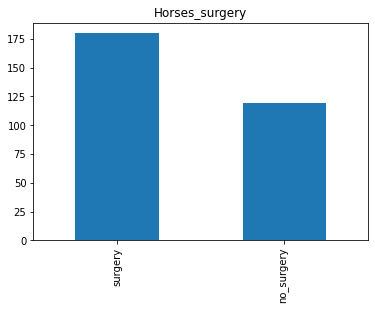

In [10]:
all_horses_df['surgery'].value_counts().plot(kind='bar', title='Horses_surgery')
plt.show()
# большая часть лошадей проходила операцию

In [11]:
all_horses_df['surgery'].isna().sum()

1

In [12]:
# есть 1 пропущенное значение, можно восстановить значение по колонкам: surgical lesion, type of lesion1,2,3

no_surgery_data = all_horses_df[all_horses_df['surgery'].isna()][['surgery', 'surgical_lesion',
                                                                  'type_of_lesion_1', 'type_of_lesion_2',
                                                                  'type_of_lesion_3']]
no_surgery_data.head()

,surgery,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3
132,NaN,1.0,3111.0,0.0,0.0


Исходя из данных можно сделать вывод, что лошадь проходила операцию и данные об этом были случайно утеряны.
Имеет смысл заменить NaN на surgery

In [13]:
all_horses_df['surgery'].iloc[132] = 'surgery'

c:\users\ivnat\projects\venvs\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
had_surg = all_horses_df['surgery'][all_horses_df['surgery'] == 'surgery'].count()
no_surg = all_horses_df['surgery'][all_horses_df['surgery'] == 'no_surgery'].count()

print(f'Horses that had surgery: {had_surg}, {round(had_surg / all_horses_df["surgery"].count() * 100, 1)}%')
print(f'Horses that hadn\'t surgery: {no_surg}, {round(no_surg / all_horses_df["surgery"].count() * 100, 1)}%')

Horses that had surgery: 181, 60.3%
Horses that hadn't surgery: 119, 39.7%


**Вывод по этапу: пропусков в данных нет, можно переходить к изучению и использовать при изучении других данных**

## Age

**Категорийное значение **

Возраст лошади

1 = Adult horse

2 = Young( < 6 months)


In [17]:
horses_age = all_horses_df['Age'].value_counts()
print(horses_age)

1.0    276
9.0     24
Name: Age, dtype: int64


Скорее всего, значение 9 было указано вместо 2 и означает молодую лошадь.
Заменим значени на текстовые.

In [18]:
all_horses_df['Age'] = all_horses_df['Age'].replace({1: 'adult', 9: 'young'})

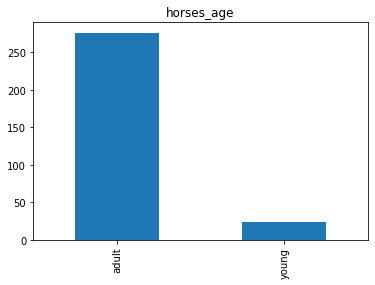

In [19]:
all_horses_df['Age'].value_counts().plot(kind='bar', title='horses_age')
plt.show()

In [20]:
adult = all_horses_df['Age'][all_horses_df['Age'] == 'adult'].count()
young = all_horses_df['Age'][all_horses_df['Age'] == 'young'].count()

print(f'Adult horses (>6 months): {adult}, {round(adult / all_horses_df["Age"].count() * 100, 1)}%')
print(f'Young horses (<6 months): {young}, {round(young / all_horses_df["Age"].count() * 100, 1)}%')

Adult horses (>6 months): 276, 92.0%
Young horses (<6 months): 24, 8.0%


**Вывод по этапу:**
пропусков в данных нет, можно переходить к изучению и использовать при изучении других данных 


## Hospital Number

**Категорийное значение **

- numeric id
- the case number assigned to the horse(may not be unique if the horse is treated > 1 time)

In [21]:
all_horses_df['Hospital_Number'].nunique()

284

Проверим сколько раз лошади повторно проходили лечение

In [23]:
surgeries_n = pd.DataFrame(all_horses_df[['Hospital_Number', 'surgery']] \
                           .groupby(by='Hospital_Number').count().value_counts()).reset_index()
print(surgeries_n)

   surgery    0
0        1  268
1        2   16


16 лошадей проходили лечение 2 раза.
2 раза - это максимальное количество раз, когда лошадь проходила лечение

In [24]:
print(
    f'Horses with 1 operation: '
    f'{surgeries_n[0][0]}, {round(surgeries_n[0][0] / all_horses_df["Hospital_Number"].count() * 100, 1)}%'
)
print(
    f'Horses with 2 operations: '
    f'{surgeries_n[0][1]}, {round(surgeries_n[0][1] / all_horses_df["Hospital_Number"].count() * 100, 1)}%'
)

Horses with 1 operation: 268, 89.3%
Horses with 2 operations: 16, 5.3%


**Вывод по этапу:** 
пропусков в данных нет, можно переходить к изучению и использовать при изучении других данных


## rectal_temperature

- linear
- in degrees celsius.
- An elevated temp may occur due to infection.
- temperature may be reduced when the animal is in late shock
- normal temp is 37.8
- this parameter will usually change as the problem progresses eg.may start out normal,
then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

** неприрывное **

In [25]:
print(
    f'Horses without rectal temperature: '
    f'{all_horses_df["rectal_temperature"].isna().sum()}, '
    f'{round(all_horses_df["rectal_temperature"].isna().sum() / all_horses_df["Hospital_Number"].count() * 100, 1)}%'
)

Horses without rectal temperature: 60, 20.0%


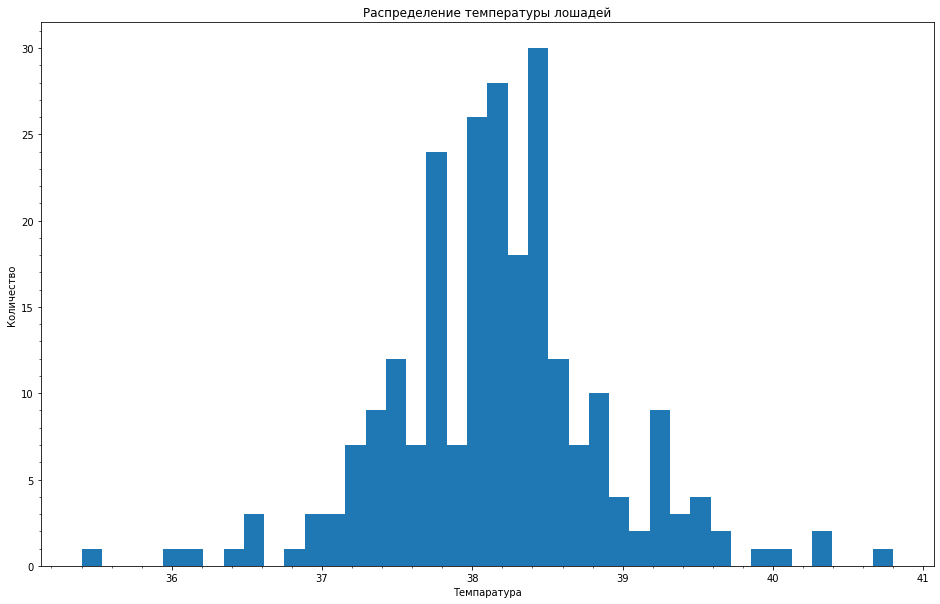

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(all_horses_df['rectal_temperature'], bins=40)
ax.xaxis.set_major_locator(MultipleLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Темпаратура')
plt.ylabel('Количество')
plt.title('Распределение температуры лошадей')
plt.show()

Распределение похоже на нормальное, провалы в графике могут быть свзязаны с пропусками данных


**Вывод по этапу:**

Исходя из описания повышенная
температура может быть связана с инфекцией, послеоперационными осложнениями, пониженная с шоком.
Скорее всего самым оптимальным будет замена пропусков на средние значния внутри групп


## pulse
- linear
- the heart rate in beats per minute
- is a reflection of the heart condition: 30 - 40 is normal for adults
- rare to have a lower than normal rate although athletic horses may have a rate of 20 - 25
- animals with painful lesions or suffering from circulatory shock may have an elevated heart rate


In [27]:
print(
    f'Missing values of horses pulse: {all_horses_df["pulse"].isna().sum()}, '
    f'{round(all_horses_df["pulse"].isna().sum() / all_horses_df["Hospital_Number"].count() * 100, 1)} %'
)

Missing values of horses pulse: 24, 8.0 %


Частота пульса может быть связана со следующими условиями:
- нормальный пульс 30 - 40 уд
- пониженный пульс у лошадей участвующих в спорте
- повышенный пульс у лошадей с circulatory shock

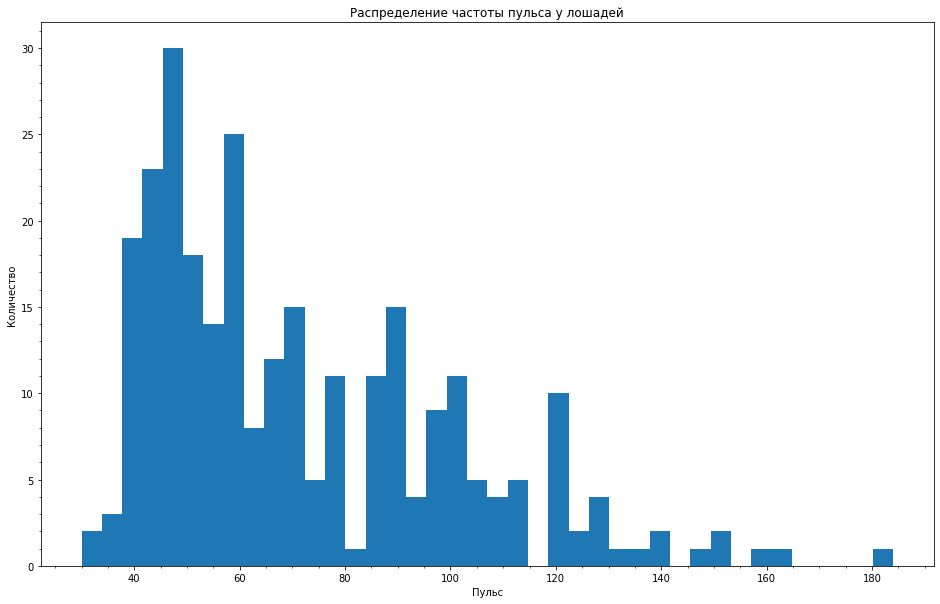

In [28]:
fig2, ax2 = plt.subplots(figsize=(16, 10))

ax2.hist(all_horses_df['pulse'], bins=40)
# ax2.xaxis.set_major_locator(MultipleLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Пульс')
plt.ylabel('Количество')
plt.title('Распределение частоты пульса у лошадей')
plt.show()

Распределение не является нормальным, скошено слева.
Имеются значения превышающие нормальные в 4 - 6 раз.

**Вывод по этапу:**

Лошадей с нормальным пульсом намного меньше, чем с повышенным.

Повышенный пульс у лошадей может быть связан с circulatory shock
(Cool и cold температура конечностей, rectal temperature, ниже 37.8,
pulse, выше 30 - 40 mucous membranes, pale pink).

Пока сложно сказать какой способ работы с пропусками оптимальный.

## respiratory_rate

- linear
- normal rate is 8 to 10
- usefulness is doubtful due to the great fluctuations


In [29]:
print(all_horses_df['respiratory_rate'].isna().sum())
print(all_horses_df['respiratory_rate'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, '%')

58
19.333333333333332 %


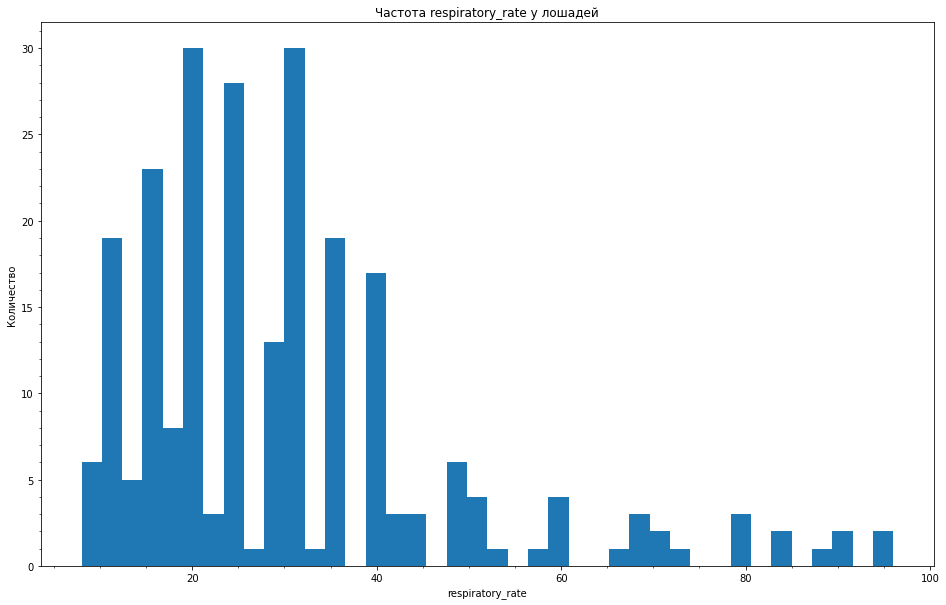

In [30]:
fig3, ax3 = plt.subplots(figsize=(16, 10))

ax3.hist(all_horses_df['respiratory_rate'], bins=40)
# ax3.xaxis.set_major_locator(MultipleLocator())
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('respiratory_rate')
plt.ylabel('Количество')
plt.title('Частота respiratory_rate у лошадей')
plt.show()

Распределение не является нормальным, скошено влево.Есть значения превышающие норму в 8 - 10 раз.
Абсолютное большинство значений превышают норму

**Вывод по этапу:**

Полезность сомнительна в связи с большим разбросом значений.

**Возможно, стоит удалить весь столбец**

## temperature_of_extremities

- a subjective indication of peripheral circulation
- possible values:

1 = Normal
2 = Warm
3 = Cool
4 = Cold

- cool to cold extremities indicate possible shock
- hot extremities should correlate with an elevated rectal temp.

In [31]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['temperature_of_extremities'] = all_horses_df['temperature_of_extremities'] \
    .replace({1: 'Normal', 2: 'Warm', 3: 'Cool', 4: 'Cold'})

In [32]:
all_horses_df['temperature_of_extremities'].value_counts()

Cool      109
Normal     78
Warm       30
Cold       27
Name: temperature_of_extremities, dtype: int64

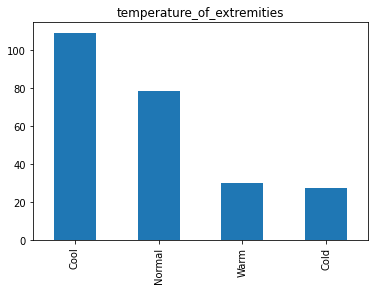

In [33]:
all_horses_df['temperature_of_extremities'].value_counts().plot(kind='bar', title='temperature_of_extremities')
plt.show()

In [34]:
print(
    f"Horses with missing temperature of extremeties: "
    f"{all_horses_df['temperature_of_extremities'].isna().sum()}, "
    f"{round(all_horses_df['temperature_of_extremities'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses with missing temperature of extremeties: 56, 18.7%


**Вывод по этапу**

Значение показателя warm кореллирует с повышенной ректальной температурой.

**Cool и cold c шоком, можно попробовать восстановить по косвенным признакам:**
- rectal temperature, ниже 37.8
- pulse, выше 30 - 40
- mucous membranes, pale pink

## peripheral_pulse

- subjective
- possible values are:

1 = normal
2 = increased
3 = reduced
4 = absent

- normal or increased p.p.are indicative of adequate circulation while reduced or absent indicate poor perfusion


In [35]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['peripheral_pulse'] = all_horses_df['peripheral_pulse'] \
    .replace({1: 'normal', 2: 'increased', 3: 'reduced', 4: 'absent'})

In [36]:
all_horses_df['peripheral_pulse'].value_counts()

normal       115
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

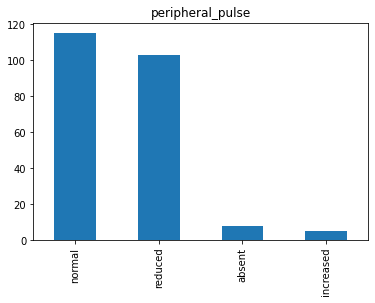

In [37]:
all_horses_df['peripheral_pulse'].value_counts().plot(kind='bar', title='peripheral_pulse')
plt.show()

In [38]:
print(
    f"Horses with missing peripheral pulse: {all_horses_df['peripheral_pulse'].isna().sum()}, "
    f"{round(all_horses_df['peripheral_pulse'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses with missing peripheral pulse: 69, 23.0%


**Вывод по этапу:**

Может быть связано с температурой конечностей temperature_of_extremities,
cool - redused, cold - absent, normal - normal, warm - increased.
Можно попробовать восстановить по этим данным


## mucous_membranes
- a subjective measurement of colour
- possible values are:

1 = normal pink
2 = bright pink
3 = pale pink
4 = pale cyanotic
5 = bright red / injected
6 = dark cyanotic

- 1 and 2 probably indicate a normal or slightly increased circulation
- 3 may occur in early shock
- 4 and 6 are indicative of serious circulatory compromise
- 5 is more indicative of a septicemia

In [39]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['mucous_membranes'] = all_horses_df['mucous_membranes'] \
    .replace(
    {1: 'normal_pink', 2: 'bright_pink', 3: 'pale_pink', 4: 'pale_cyanotic', 5: 'bright_red', 6: 'dark_cyanotic'})

In [40]:
all_horses_df['mucous_membranes'].value_counts()

normal_pink      79
pale_pink        58
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    20
Name: mucous_membranes, dtype: int64

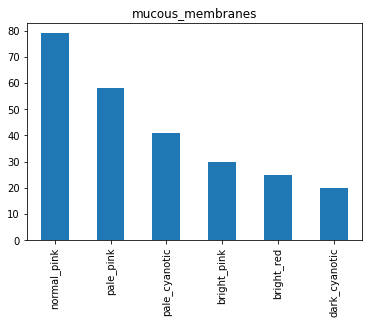

In [41]:
all_horses_df['mucous_membranes'].value_counts().plot(kind='bar', title='mucous_membranes')
plt.show()

In [42]:
print(
    f"Horses with missing mucous membranes color data: {all_horses_df['mucous_membranes'].isna().sum()}, "
    f"{round(all_horses_df['mucous_membranes'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses with missing mucous membranes color data: 47, 15.7%


** Вывод по этапу: **
можно восстановить часть значений по косвенным признакам:
- normal pink и bright pink - нормальная и увеличенная циркуляция
- pale pink - шок
- pale cyanotic и dark cyanotic - сниженная и отсутстсвующая циркуляция
- dark cyanotic - сепсис(нет данных)

## capillary_refill_time
- a clinical judgement.The longer the refill, the poorer the circulation
- possible values 1 = < 3 seconds 2 = >= 3 seconds


In [43]:
all_horses_df['capillary_refill_time'].value_counts()

1.0    188
2.0     78
3.0      2
Name: capillary_refill_time, dtype: int64

Есть значение - 3, не входящее в перечень допустимых категорий - 1 и 2.

Возможно, 3 - это значение "3 секунды" и его можно отнести к категории 2.


In [46]:
cap_ref_3 = all_horses_df[all_horses_df['capillary_refill_time'] == 3]
cap_ref_3.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
78,surgery,adult,530693,NaN,NaN,NaN,Cool,reduced,pale_pink,3.0,5.0,3.0,3.0,3.0,2.0,NaN,4.0,5.0,46.0,5.9,NaN,NaN,2.0,1.0,3025.0,0.0,0.0,2.0
85,no_surgery,adult,529304,38.0,54.0,30.0,Warm,reduced,pale_pink,3.0,3.0,1.0,2.0,2.0,2.0,NaN,NaN,4.0,45.0,6.2,NaN,NaN,1.0,2.0,400.0,0.0,0.0,2.0


В обоих случаях mucous_membranes pale_pink и peripheral_pulse reduced,
что может быть связано с проблемами с циркуляцией, так что есть основание предположить,
что 3 - это "3 секунды" и отнести эти значения ко второй группе

In [47]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['capillary_refill_time'] = all_horses_df['capillary_refill_time'] \
    .replace({1: 'normal', 2: 'poor', 3: 'poor'})

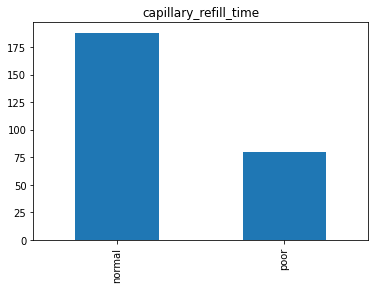

In [48]:
all_horses_df['capillary_refill_time'].value_counts().plot(kind='bar', title='capillary_refill_time')
plt.show()

In [49]:
print(
    f"Horses without capillary refill time data: {all_horses_df['capillary_refill_time'].isna().sum()}, "
    f"{round(all_horses_df['capillary_refill_time'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses without capillary refill time data: 32, 10.7%


**Вывод по этапу:**

Отсутствует 10 % значений, возможно, можно восстановить значение по значениям mucous_membranes и peripheral_pulse
- mucous_membranes normal pink, bright pink и peripheral_pulse со значениями normal, increased - 1
- mucous_membranes pale cyanotic, dark cyanotic и peripheral_pulse со значениями reduced, absent - 2

## pain
pain - a subjective judgement of the horse's pain level - possible values:

1 = alert, no pain
2 = depressed
3 = intermittent mild pain
4 = intermittent severe pain
5 = continuous severe pain

- should NOT be treated as a ordered or discrete variable!
- In general, the more painful, the more likely it is to require surgery
- prior treatment of pain may mask the pain level to some extent

In [50]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['pain'] = all_horses_df['pain'] \
    .replace({1: 'no_pain', 2: 'depressed', 3: 'intermittent_mild_pain',
              4: 'intermittent_severe_pain', 5: 'continuous_severe_pain'})

In [51]:
all_horses_df['pain'].value_counts()

intermittent_mild_pain      67
depressed                   59
continuous_severe_pain      42
intermittent_severe_pain    39
no_pain                     38
Name: pain, dtype: int64

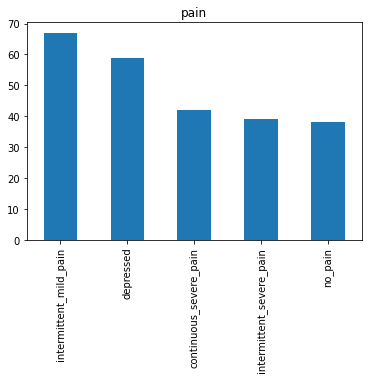

In [52]:
all_horses_df['pain'].value_counts().plot(kind='bar', title='pain')
plt.show()

In [53]:
print(
    f"Horses with missing pain level data: {all_horses_df['pain'].isna().sum()}, "
    f"{round(all_horses_df['pain'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}"
)

Horses with missing pain level data: 55, 18.3


**Вывод по этапу**

в описании не указана взаимосвязь pain с другими данными, но чем хуже симптомы, тем сильнее уровень боли,
abdominal_distention moderate, severe связан с наличием боли, чем больше, тем выше уровень боли

## peristalsis
- an indication of the activity in the horse's gut.
As the gut becomes more distended or the horse becomes more toxic, the activity decreases
- possible values:
1 = hypermotile
2 = normal
3 = hypomotile
4 = absent

In [54]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['peristalsis'] = all_horses_df['peristalsis'] \
    .replace({1: 'hypermotile', 2: 'normal', 3: 'hypomotile', 4: 'absent'})

In [55]:
all_horses_df['peristalsis'].value_counts()

hypomotile     128
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

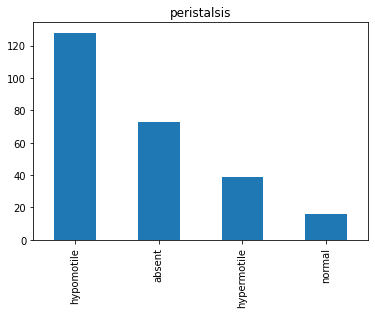

In [56]:
all_horses_df['peristalsis'].value_counts().plot(kind='bar', title='peristalsis')
plt.show()

In [57]:
print(
    f"Horses with missing persistalsis data: {all_horses_df['peristalsis'].isna().sum()}, "
    f"{round(all_horses_df['peristalsis'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses with missing persistalsis data: 44, 14.7%


**Вывод по этапу:**

abdominal_distention moderate, severe может быть связан с persistalsis hypomotile, absent

## abdominal_distension

- An IMPORTANT parameter.
- possible values
1 = none
2 = slight
3 = moderate
4 = severe
- an animal with abdominal distension is likely to be painful and have reduced gut motility.
- a horse with severe abdominal distension is likely to require surgery just to relieve the pressure

In [58]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['abdominal_distension'] = all_horses_df['abdominal_distension'] \
    .replace({1: 'none', 2: 'slight', 3: 'moderate', 4: 'severe'})

In [59]:
all_horses_df['abdominal_distension'].value_counts()

none        76
slight      65
moderate    65
severe      38
Name: abdominal_distension, dtype: int64

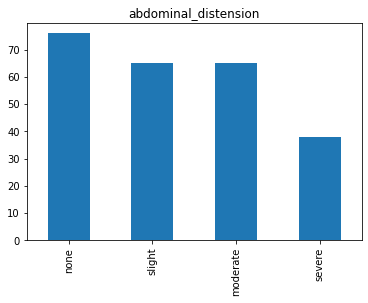

In [60]:
all_horses_df['abdominal_distension'].value_counts().plot(kind='bar', title='abdominal_distension')
plt.show()

In [61]:
print(
    f"Horses with missing abdominal distention data: {all_horses_df['abdominal_distension'].isna().sum()}, "
    f"{round(all_horses_df['abdominal_distension'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Horses with missing abdominal distention data: 56, 18.7%


**Вывод по этапу:**

в данных много пропусков, необходимо:
- abdominal_distension moderate, severe может быть связан с persistalsis hypomotile, absent
- Значение связано с уровнем боли, чем выше уровень боли, тем вероятнее будут значение severe,и верятнее операционное вмешательство

## nasogastric_tube
- this refers to any gas coming out of the tube
- possible values:

1 = none
2 = slight
3 = significant
- a large gas cap in the stomach is likely to give the horse discomfort

In [62]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['nasogastric_tube'] = all_horses_df['nasogastric_tube'] \
    .replace({1: 'none', 2: 'slight', 3: 'significant'})

In [63]:
all_horses_df['nasogastric_tube'].value_counts()

slight         102
none            71
significant     23
Name: nasogastric_tube, dtype: int64

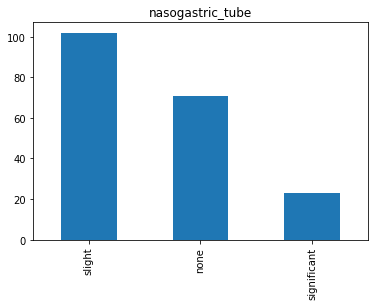

In [64]:
all_horses_df['nasogastric_tube'].value_counts().plot(kind='bar', title='nasogastric_tube')
plt.show()

In [65]:
print(
    f"Missing nasogastric tube data: {all_horses_df['nasogastric_tube'].isna().sum()}, "
    f"{round(all_horses_df['nasogastric_tube'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing nasogastric tube data: 104, 34.7%


**Вывод по этапу:**

Есть вероятность, что nasogastric_tube не вводили, поэтому данные отсутсвуют.
О наличии газов могут свидетельствовать косвенные признаки, например, abdominal_distension и уровень pain.
Нужно уточнить взаимозависимость данных

## nasogastric_reflux

- possible values

1 = none
2 = > 1 liter
3 = < 1 liter
- the greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passagefrom the rest of the intestine

In [66]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['nasogastric_reflux'] = all_horses_df['nasogastric_reflux'] \
    .replace({1: 'none', 2: 'more_1_liter', 3: 'less_1_liter'})

In [67]:
all_horses_df['nasogastric_reflux'].value_counts()

none            120
less_1_liter     39
more_1_liter     35
Name: nasogastric_reflux, dtype: int64

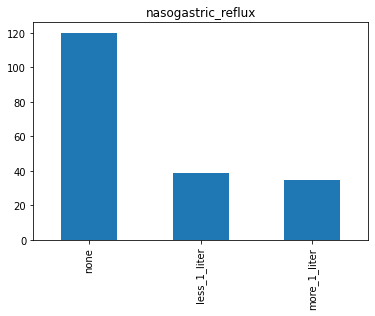

In [68]:
all_horses_df['nasogastric_reflux'].value_counts().plot(kind='bar', title='nasogastric_reflux')
plt.show()

In [69]:
print(
    f"Missing nasogastric reflux data: {all_horses_df['nasogastric_reflux'].isna().sum()}, "
    f"{round(all_horses_df['nasogastric_reflux'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing nasogastric reflux data: 106, 35.3%


**Вывод по этапу:**

Пропусков примерно столько же, сколько и в nasogastric_tube,
скорее всего эти показатели связаны напрямую - nasogastric_reflux измеряется с помощью nasogastric_tube.
Показатель nasogastric_reflux больше 1 литра может быть связан с показателем rectal_examination_feces - absent,
т.к.последнее значение связано с пониженной проходимостью кишечника

## nasogastric_reflux_PH

- linear
- scale is from 0 to 14 with 7 being neutral
- normal values are in the 3 to 4 range

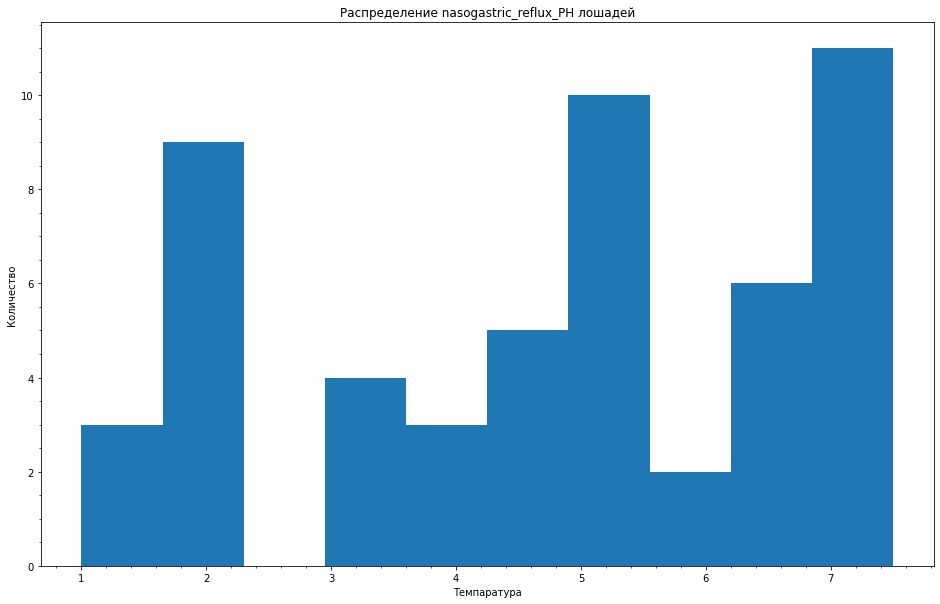

In [70]:
fig4, ax4 = plt.subplots(figsize=(16, 10))
ax4.hist(all_horses_df['nasogastric_reflux_PH'])
ax4.xaxis.set_major_locator(MultipleLocator())
ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
ax4.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('Темпаратура')
plt.ylabel('Количество')
plt.title('Распределение nasogastric_reflux_PH лошадей')
plt.show()

In [71]:
print(
    f"Missing nasogastric reflux PH data: {all_horses_df['nasogastric_reflux_PH'].isna().sum()}, "
    f"{round(all_horses_df['nasogastric_reflux_PH'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing nasogastric reflux PH data: 247, 82.3%


**Вывод по этапу:**

Отсутствует более 80 % значений, так же в описании нет взаимосвязи с остальными данными,
поэтому восстановление маловероятно.

Самым лучшим решением тут будет - удаление этих данных

## rectal_examination_feces

- possible values

1 = normal
2 = increased
3 = decreased
4 = absent
- absent feces probably indicates an obstruction

In [72]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['rectal_examination_feces'] = all_horses_df['rectal_examination_feces'] \
    .replace({1: 'normal', 2: 'increased', 3: 'decreased', 4: 'absent'})

In [73]:
all_horses_df['rectal_examination_feces'].value_counts()

absent       79
normal       57
decreased    49
increased    13
Name: rectal_examination_feces, dtype: int64

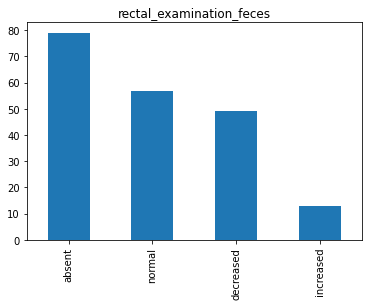

In [74]:
all_horses_df['rectal_examination_feces'].value_counts().plot(kind='bar', title='rectal_examination_feces')
plt.show()

In [75]:
print(
    f"Missing rectal examination feces data: {all_horses_df['rectal_examination_feces'].isna().sum()}, "
    f"{round(all_horses_df['rectal_examination_feces'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing rectal examination feces data: 102, 34.0%


**Вывод по этапу:**

rectal_examination_feces absent может быть связан с persistalsis absent и nasogastric_reflux больше 1 литра

## abdomen

- possible values

1 = normal
2 = other
3 = firm feces in the large intestine
4 = distended small intestine
5 = distended large intestine

- 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically
- 4 and 5 indicate a surgical lesion

In [76]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['abdomen'] = all_horses_df['abdomen'] \
    .replace({1: 'normal', 2: 'other', 3: 'firm_feces_large_intestine',
              4: 'distended_small_intestine', 5: 'distended_large_intestine'})

In [77]:
all_horses_df['abdomen'].value_counts()

distended_large_intestine     79
distended_small_intestine     43
normal                        28
other                         19
firm_feces_large_intestine    13
Name: abdomen, dtype: int64

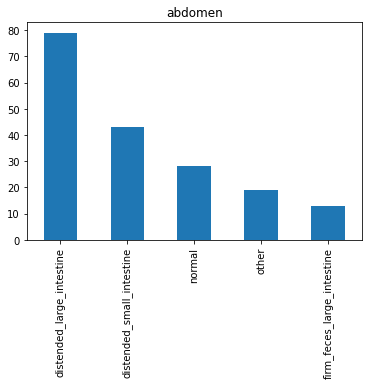

In [78]:
all_horses_df['abdomen'].value_counts().plot(kind='bar', title='abdomen')
plt.show()

In [79]:
print(
    f"Missing abdomen data: {all_horses_df['abdomen'].isna().sum()}, "
    f"{round(all_horses_df['abdomen'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing abdomen data: 118, 39.3%


**Вывод по этапу:**

abdomen firm_feces_large_intestine может быть связан с rectal_examination_feces absent
и nasogastric_reflux больше 1 литра.
abdomen distended small intestine и distended
large intestine с хирургическими осложнениями

## packed cell volume

- linear
- the  # of red cells by volume in the blood
- normal range is 30 to 50.

The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

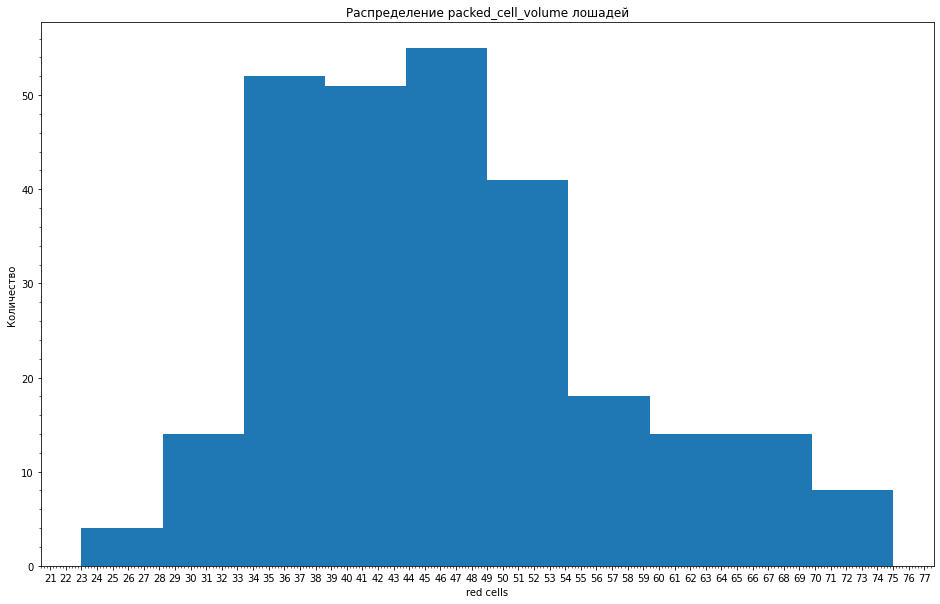

In [80]:
fig5, ax5 = plt.subplots(figsize=(16, 10))

ax5.hist(all_horses_df['packed_cell_volume'])
ax5.xaxis.set_major_locator(MultipleLocator())
ax5.xaxis.set_minor_locator(AutoMinorLocator(5))
ax5.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('red cells')
plt.ylabel('Количество')
plt.title('Распределение packed_cell_volume лошадей')
plt.show()

In [81]:
print(
    f"Missing packed cell volume data: {all_horses_df['packed_cell_volume'].isna().sum()}, "
    f"{round(all_horses_df['packed_cell_volume'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing packed cell volume data: 29, 9.7%


**Вывод по этапу:**

У большинства лошадей нормальный показатель количества red cell. Нужно узнать причину пропусков.
Повышенный уровень связан с compromised circulation (mucus membranes pale, rectal_examination_feces absent,
persistalsis absent и nasogastric_reflux больше 1 литра)


## total protein
- linear
- normal values lie in the 6 - 7.5(gms / dL) range
- the higher the value the greater the dehydration

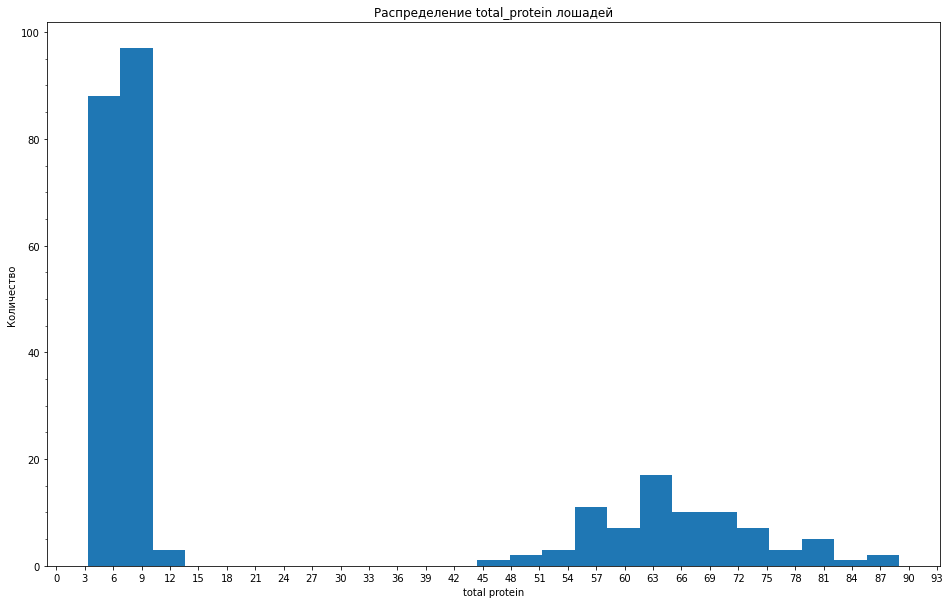

In [82]:
fig6, ax6 = plt.subplots(figsize=(16, 10))

ax6.hist(all_horses_df['total_protein'], bins=25)
ax6.xaxis.set_major_locator(MultipleLocator(3))
ax6.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('total protein')
plt.ylabel('Количество')
plt.title('Распределение total_protein лошадей')
plt.show()

In [84]:
print(
    f"Missing total rotein data: {all_horses_df['total_protein'].isna().sum()}, "
    f"{round(all_horses_df['total_protein'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing total rotein data: 33, 11.0%


**Вывод по этапу:**

Повышенный уровень total protein связан с обезвоживанием.
Что связывает его с повышенным уровнем packed_cell_volume

## abdominocentesis appearance

- a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity
- possible values:

1 = clear
2 = cloudy
3 = serosanguinous
- normal fluid is clear while cloudy or serosanguinous indicates a compromised gut


In [85]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['abdominocentesis_appearance'] = all_horses_df['abdominocentesis_appearance'] \
    .replace({1: 'clear', 2: 'cloudy', 3: 'serosanguinous'})

In [86]:
all_horses_df['abdominocentesis_appearance'].value_counts()

cloudy            48
serosanguinous    46
clear             41
Name: abdominocentesis_appearance, dtype: int64

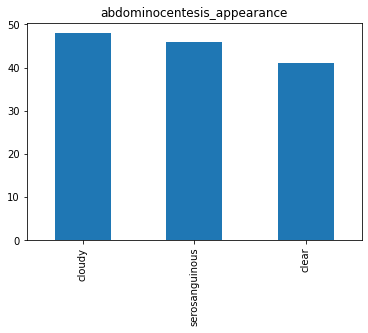

In [87]:
all_horses_df['abdominocentesis_appearance'].value_counts().plot(kind='bar', title='abdominocentesis_appearance')
plt.show()

In [88]:
print(
    f"Missing abdominocentesis appearance data: {all_horses_df['abdominocentesis_appearance'].isna().sum()}, "
    f"{round(all_horses_df['abdominocentesis_appearance'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing abdominocentesis appearance data: 165, 55.0%


**Вывод по этапу:**
    
Более половины значений нет.Возможно это связано с тем, что эту процедуру не делали.
Значения распределены примерно поровну. Если не будет найдена причина пропусков, возможно,
лучшим выходом будет удаление данных.

## abdomcentesis total protein

- linear
- the higher the level of protein the more likely it is to have a compromised gut.

Values are in gms / dL

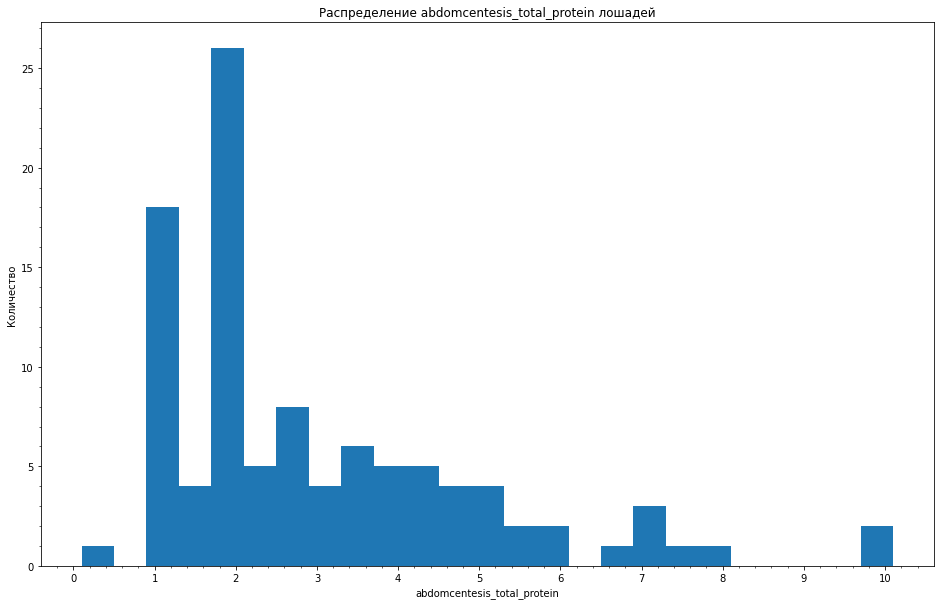

In [89]:
fig7, ax7 = plt.subplots(figsize=(16, 10))

ax7.hist(all_horses_df['abdomcentesis_total_protein'], bins=25)
ax7.xaxis.set_major_locator(MultipleLocator())
ax7.xaxis.set_minor_locator(AutoMinorLocator())
ax7.yaxis.set_minor_locator(AutoMinorLocator())
plt.xlabel('abdomcentesis_total_protein')
plt.ylabel('Количество')
plt.title('Распределение abdomcentesis_total_protein лошадей')
plt.show()

In [90]:
print(
    f"Missing abdomcentesis total protein data: {all_horses_df['abdomcentesis_total_protein'].isna().sum()}, "
    f"{round(all_horses_df['abdomcentesis_total_protein'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing abdomcentesis total protein data: 198, 66.0%


**Вывод по этапу:**

Больше половины пропущено, нет референсных значений.
Показывает вероятность compromised gut, как и многие другие показатели.
Возможно лучший выход - удаление данных.

## outcome
- what eventually happened to the horse?
- possible values:

1 = lived
2 = died
3 = was euthanized

In [91]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['outcome'] = all_horses_df['outcome'] \
    .replace({1: 'lived', 2: 'died', 3: 'euthanized'})

In [92]:
all_horses_df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

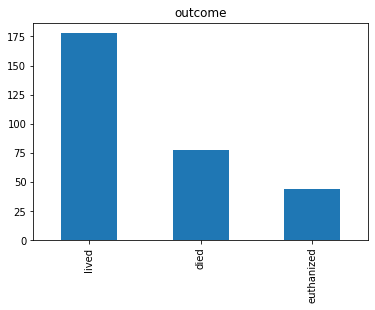

In [93]:
all_horses_df['outcome'].value_counts().plot(kind='bar', title='outcome')
plt.show()

In [94]:
print(
    f"Missing outcome data: {all_horses_df['outcome'].isna().sum()}, "
    f"{round(all_horses_df['outcome'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing outcome data: 1, 0.3%


In [97]:
# Нет информации только об одной лошади, посмотрим на данные подробнее

no_outcome = all_horses_df[all_horses_df['outcome'].isna()]
no_outcome.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
132,surgery,adult,534572,38.0,48.0,20.0,Cool,normal,pale_pink,normal,intermittent_severe_pain,hypomotile,none,slight,none,NaN,decreased,distended_large_intestine,43.0,73.0,cloudy,1.0,NaN,1.0,3111.0,0.0,0.0,2.0


In [99]:
no_outcome_num = all_horses_df[all_horses_df['Hospital_Number'] == 534572]
no_outcome_num.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
132,surgery,adult,534572,38.0,48.0,20.0,Cool,normal,pale_pink,normal,intermittent_severe_pain,hypomotile,none,slight,none,NaN,decreased,distended_large_intestine,43.0,73.0,cloudy,1.0,NaN,1.0,3111.0,0.0,0.0,2.0


**Вывод по этапу:**

Отсутствует одно значение. Лошадь проходила лечение только 1 раз.
Есть два варианта - попробовать предсказать исход по имеющимся данным, либо удалить всю строку

### surgical lesion?

- retrospectively, was the problem(lesion) surgical?
- all cases are either operated upon or autopsied so that this value and the lesion type are always known
- possible values:

1 = Yes
2 = No

In [100]:
# заменяем числовое значение на текстовое для удобства

all_horses_df['surgical_lesion'] = all_horses_df['surgical_lesion'] \
    .replace({1: 'Yes', 2: 'No'})

In [101]:
all_horses_df['surgical_lesion'].value_counts()

Yes    191
No     109
Name: surgical_lesion, dtype: int64

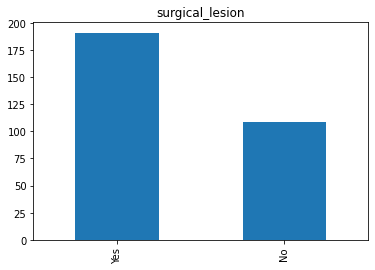

In [102]:
all_horses_df['surgical_lesion'].value_counts().plot(kind='bar', title='surgical_lesion')
plt.show()

In [103]:
print(
    f"Missing surgical lesion data: {all_horses_df['surgical_lesion'].isna().sum()}, "
    f"{round(all_horses_df['surgical_lesion'].isna().sum() / all_horses_df['Hospital_Number'].count() * 100, 1)}%"
)

Missing surgical lesion data: 0, 0.0%


**Вывод по этапу:**

данные полные

### types of lesion

- first number is site of lesion

1 = gastric
2 = sm intestine
3 = lg colon
4 = lg colon and cecum
5 = cecum
6 = transverse colon
7 = retum / descending colon
8 = uterus
9 = bladder
11 = all intestinal sites
00 = none

- second number is type

1 = simple
2 = strangulation
3 = inflammation
4 = other

- third number is subtype

1 = mechanical
2 = paralytic
0 = n / a

- fourth number is specific code

1 = obturation
2 = intrinsic
3 = extrinsic
4 = adynamic
5 = volvulus / torsion
6 = intussuption
7 = thromboembolic
8 = hernia
9 = lipoma / slenic
incarceration
10 = displacement
0 = n / a

In [104]:
all_horses_df[(all_horses_df['surgical_lesion'] == 'Yes') & (all_horses_df['type_of_lesion_1'] == 0.0)] \
    ['type_of_lesion_1']

145    0.0
Name: type_of_lesion_1, dtype: float64

In [105]:
all_horses_df.iloc[145]

surgery                         no_surgery
Age                                  adult
Hospital_Number                     535246
rectal_temperature                     NaN
pulse                                   80
respiratory_rate                        32
temperature_of_extremities            Cool
peripheral_pulse                   reduced
mucous_membranes               bright_pink
capillary_refill_time               normal
pain                             depressed
peristalsis                     hypomotile
abdominal_distension              moderate
nasogastric_tube                    slight
nasogastric_reflux                    none
nasogastric_reflux_PH                  NaN
rectal_examination_feces         decreased
abdomen                                NaN
packed_cell_volume                      50
total_protein                           80
abdominocentesis_appearance            NaN
abdomcentesis_total_protein            NaN
outcome                              lived
surgical_le

Как минимум одно значение отсутсвует.
Отсутствие других значений определить наверняка нельзя, т.к.осложнения могут отсутствовать

In [106]:
all_horses_df[all_horses_df['type_of_lesion_1'] == 0.0]['type_of_lesion_1'].count()
# без осложнений

56

**Вывод по этапу**
Оставляем данные в том виде в котором они есть, т.к. определить наличие/отсутствие осложнений по имеющимся данным нельзя.

## Работа с пропусками


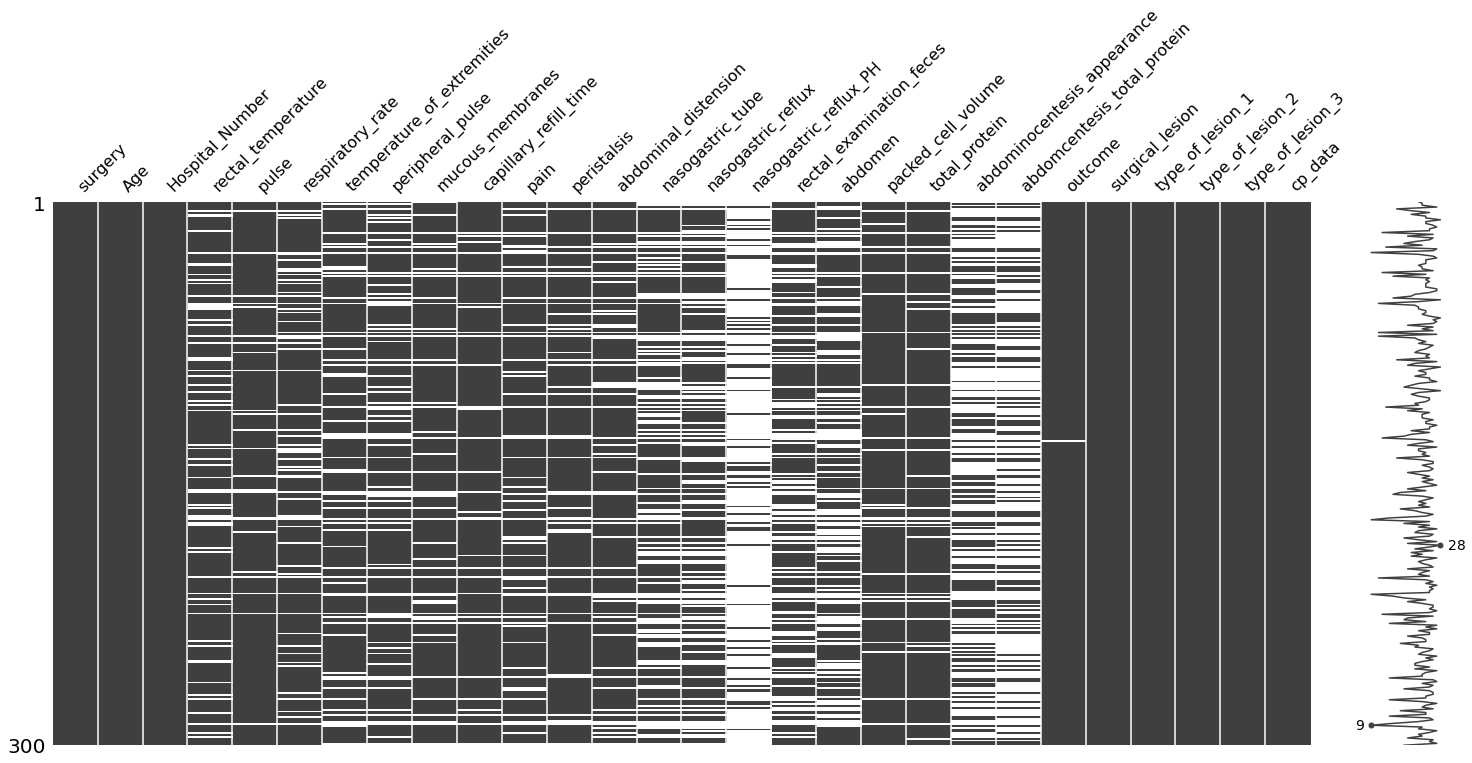

In [108]:
msno.matrix(all_horses_df)
plt.show()

# Есть закономерности в пропусках данных, необходимо уточнятьэто случайность или есть взаимосвязь

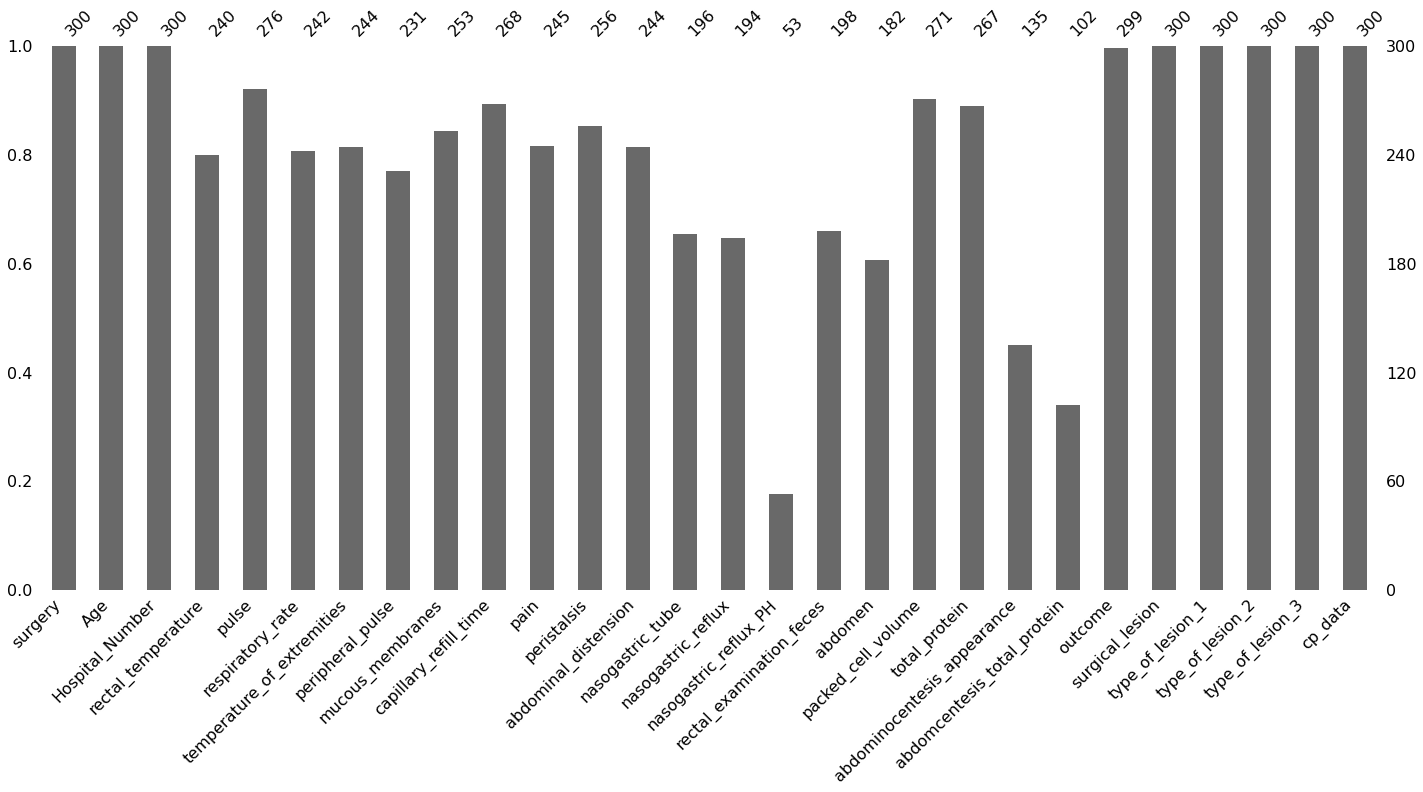

In [109]:
msno.bar(all_horses_df)
plt.show()

In [110]:
# Удалим строки в которых отсутсвует больше 70 % значений

all_horses_df.shape

(300, 28)

В датасете 9 столбцов без пропусков, 19 столбцов с пропусками.
Удалим строки в которых отсутсвует больше 15 строк (ок 80%), остальные попытаемся восстановить.


In [111]:
all_horses_df = all_horses_df.dropna(thresh=13)  # Оставляем строки где не пропущено 13 значений и больше

In [112]:
# Сортируем значения: строки по убыванию пропусков

all_horses_df_sorted = all_horses_df.sort_values(by=[
    'rectal_temperature',
    'pulse', 'respiratory_rate', 'temperature_of_extremities',
    'peripheral_pulse', 'mucous_membranes', 'capillary_refill_time',
    'pain', 'peristalsis', 'abdominal_distension', 'nasogastric_tube',
    'nasogastric_reflux', 'nasogastric_reflux_PH', 'rectal_examination_feces',
    'abdomen', 'packed_cell_volume', 'total_protein', 'abdominocentesis_appearance',
    'abdomcentesis_total_protein', 'outcome', 'surgical_lesion', 'type_of_lesion_1',
    'type_of_lesion_2', 'type_of_lesion_3'], na_position='first')

all_horses_df_sorted.head(20)

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3,cp_data
160,surgery,adult,527916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermittent_severe_pain,NaN,NaN,none,none,NaN,NaN,distended_large_intestine,35.0,58.0,cloudy,1.0,lived,Yes,4205.0,0.0,0.0,2.0
174,no_surgery,adult,518476,NaN,NaN,NaN,Cool,absent,dark_cyanotic,NaN,intermittent_severe_pain,NaN,severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,Yes,3400.0,0.0,0.0,1.0
93,no_surgery,adult,530310,NaN,NaN,NaN,Cool,reduced,normal_pink,normal,continuous_severe_pain,hypomotile,moderate,none,none,NaN,absent,distended_large_intestine,38.0,6.5,NaN,NaN,died,Yes,3205.0,0.0,0.0,2.0
78,surgery,adult,530693,NaN,NaN,NaN,Cool,reduced,pale_pink,poor,continuous_severe_pain,hypomotile,moderate,significant,more_1_liter,NaN,absent,distended_large_intestine,46.0,5.9,NaN,NaN,died,Yes,3025.0,0.0,0.0,2.0
136,surgery,adult,530693,NaN,NaN,NaN,Cool,reduced,pale_pink,poor,continuous_severe_pain,hypomotile,moderate,significant,more_1_liter,NaN,absent,distended_large_intestine,46.0,5.9,NaN,NaN,died,Yes,3025.0,0.0,0.0,2.0
52,no_surgery,adult,529483,NaN,NaN,NaN,Normal,normal,pale_pink,normal,no_pain,hypomotile,none,NaN,NaN,NaN,increased,other,43.0,7.7,NaN,NaN,lived,No,3111.0,0.0,0.0,2.0
5,no_surgery,adult,528355,NaN,NaN,NaN,Warm,normal,pale_pink,normal,depressed,hypomotile,slight,slight,none,NaN,decreased,firm_feces_large_intestine,NaN,NaN,NaN,NaN,lived,No,0.0,0.0,0.0,2.0
159,no_surgery,adult,528134,NaN,NaN,12.0,Normal,normal,bright_pink,normal,depressed,hypermotile,slight,significant,none,NaN,normal,firm_feces_large_intestine,44.0,7.5,cloudy,NaN,lived,No,0.0,0.0,0.0,1.0
58,surgery,adult,528298,NaN,NaN,20.0,Cold,reduced,pale_pink,NaN,continuous_severe_pain,absent,moderate,slight,NaN,NaN,absent,distended_small_intestine,53.0,5.9,serosanguinous,NaN,died,Yes,3205.0,0.0,0.0,1.0
115,no_surgery,adult,533723,NaN,NaN,40.0,Cool,normal,normal_pink,normal,intermittent_mild_pain,hypomotile,slight,NaN,NaN,NaN,NaN,NaN,45.0,70.0,NaN,NaN,lived,No,0.0,0.0,0.0,2.0


In [113]:
# удаляем колонки с большим количеством пропусков и неинформативными данными:
# respiratory_rate, nasogastric_reflux_PH, cp_data
all_horses_df = all_horses_df.drop(columns=['respiratory_rate', 'nasogastric_reflux_PH', 'cp_data'])

In [197]:
# также есть один пропуск в колонке outcome, проверим остался ли эта запись в наших данных

all_horses_df[all_horses_df['Hospital_Number'] == 534572]

,surgery,Age,Hospital_Number,rectal_temperature,pulse,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3
132,surgery,adult,534572,38.0,48.0,Cool,normal,pale_pink,normal,intermittent_severe_pain,hypomotile,none,slight,none,decreased,distended_large_intestine,43.0,73.0,cloudy,1.0,NaN,Yes,3111.0,0.0,0.0


In [ ]:
# сделаем пр

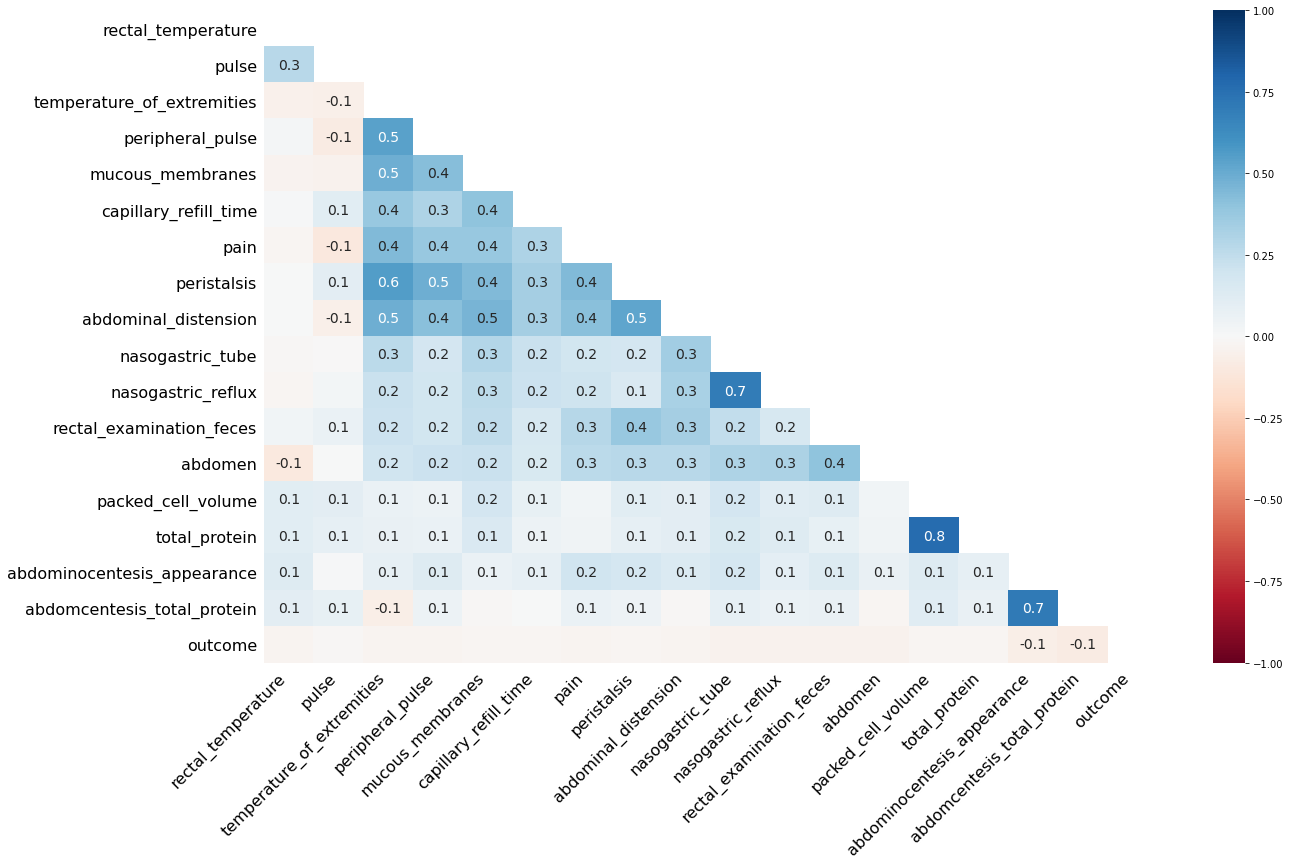

In [115]:
msno.heatmap(all_horses_df)
plt.show()

# В большинстве случаев корреляция в пропусках данных отсутствует.
# Есть взаимосвязь nasogastic_reflux и nasogastic_tube, total_protein и packed_cell_volume, 
# abdomcentesis_total_protein и abdomcentesis_appearance, т.к. очевидно эти процедуры проводятся вместе, 
# либо одна зависит от другой.


Рассмотрим каждый столбец в отдельности вместе со связанными данными (из описания и корелляции пропусков)

### rectal_temperature
Нормальное значение 37.8

отсутствие rectal_temperature кореллирует с отсутствием значения pulse

Повышенная температура кореллирует с инфекцией и осложнениями

Пониженная с шоком



<AxesSubplot:>

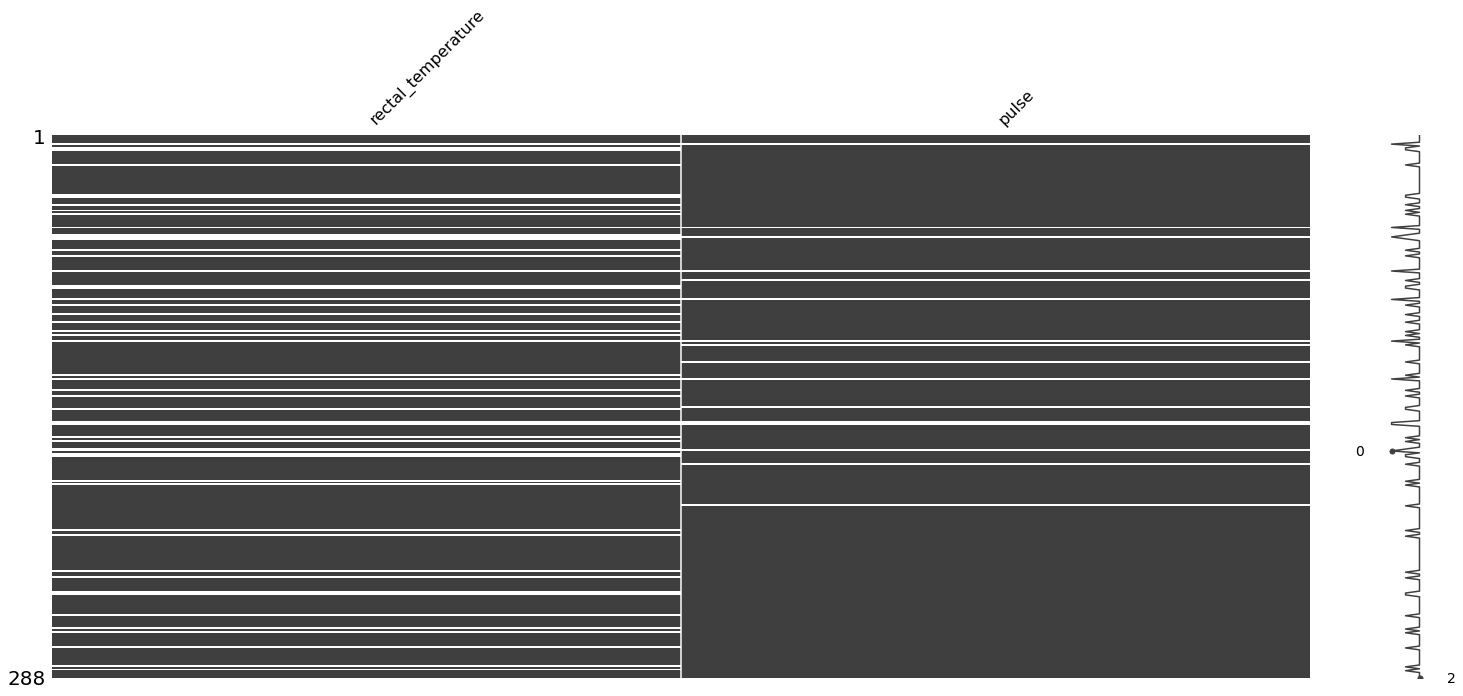

In [117]:
# посмотрим как взаимосвязаны пропуски
msno.matrix(all_horses_df[['rectal_temperature', 'pulse']])

# Взаимосвязь пропусков выглядит случайной, но возможно есть причина, но исходя из имеющихся данных она не ясна
# MAR

# Попробуем разделить на группы и определить средние значения внутри групп
# Инфекция и осложнения - Warm temperature_of_extremities, mucous_membranes bright red / injected и dark cyanotic,
# abdomen distended small intestine и distended large intestine

# Шок - пульс выше 40 уд, Cool и cold temperature_of_extremities, mucous membranes pale pink

In [118]:
norm_rect_temp = all_horses_df[all_horses_df['rectal_temperature'] == 37.8]
low_rect_temp = all_horses_df[all_horses_df['rectal_temperature'] < 37.8]
high_rect_temp = all_horses_df[all_horses_df['rectal_temperature'] > 37.8]

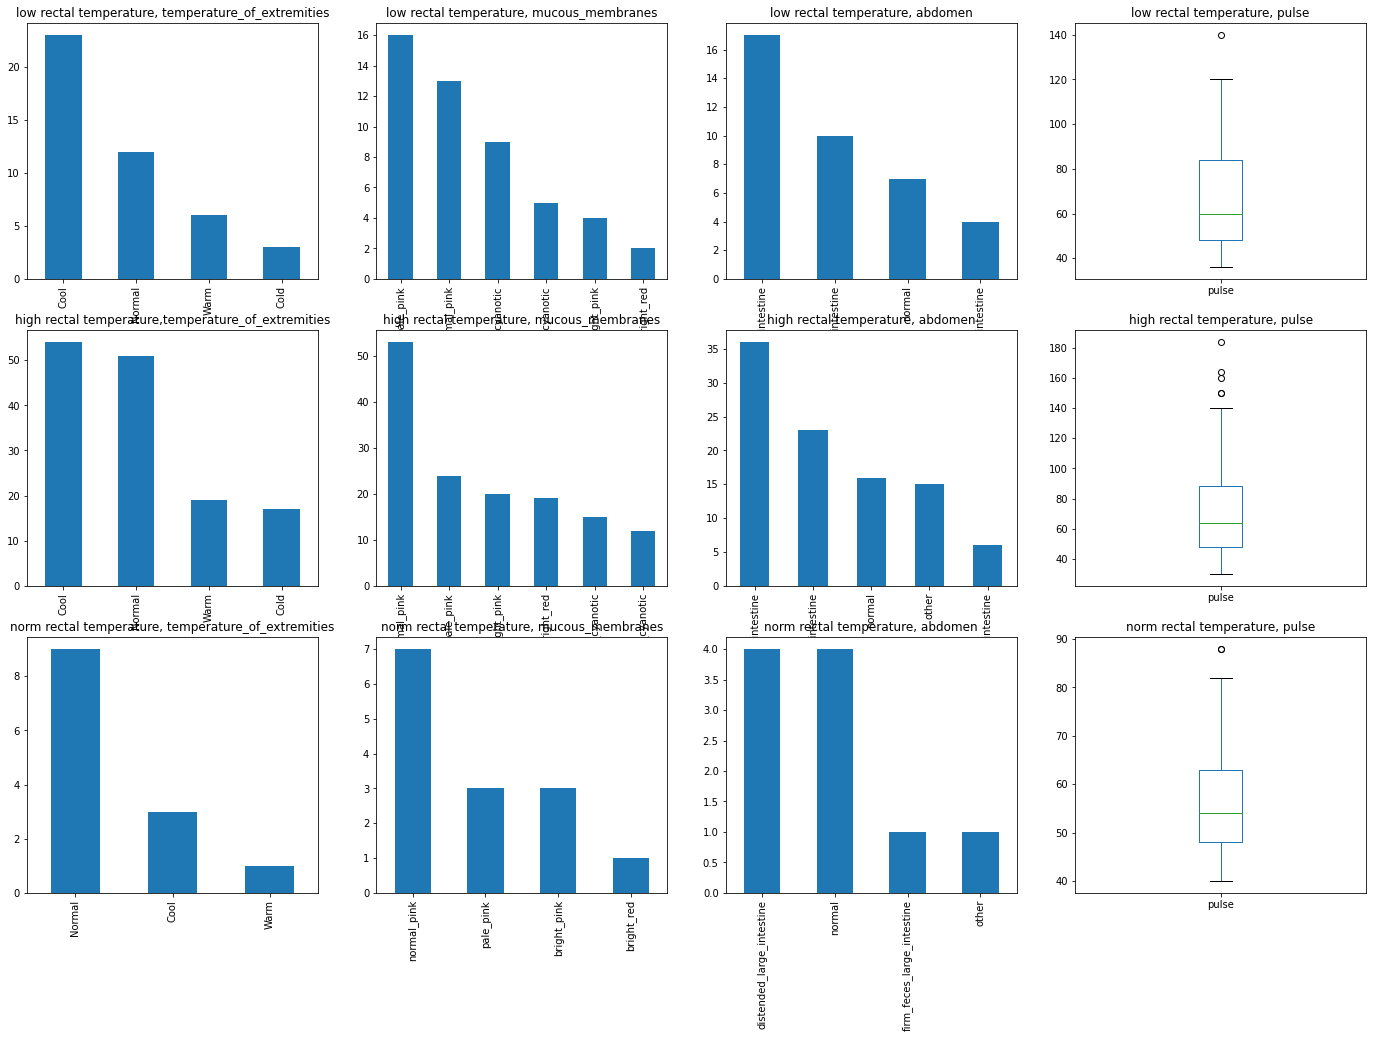

In [119]:
# Значения должны различаться согласно описанию выше для выбранных групп

fig8, axs8 = plt.subplots(3, 4, figsize=(24, 16))
low_rect_temp['temperature_of_extremities'].value_counts().plot(kind='bar', ax=axs8[0, 0])
low_rect_temp['mucous_membranes'].value_counts().plot(kind='bar', ax=axs8[0, 1])
low_rect_temp['abdomen'].value_counts().plot(kind='bar', ax=axs8[0, 2])
low_rect_temp['pulse'].plot(kind='box', ax=axs8[0, 3])

high_rect_temp['temperature_of_extremities'].value_counts().plot(kind='bar', ax=axs8[1, 0])
high_rect_temp['mucous_membranes'].value_counts().plot(kind='bar', ax=axs8[1, 1])
high_rect_temp['abdomen'].value_counts().plot(kind='bar', ax=axs8[1, 2])
high_rect_temp['pulse'].plot(kind='box', ax=axs8[1, 3])

norm_rect_temp['temperature_of_extremities'].value_counts().plot(kind='bar', ax=axs8[2, 0])
norm_rect_temp['mucous_membranes'].value_counts().plot(kind='bar', ax=axs8[2, 1])
norm_rect_temp['abdomen'].value_counts().plot(kind='bar', ax=axs8[2, 2])
norm_rect_temp['pulse'].plot(kind='box', ax=axs8[2, 3])

axs8[0, 0].set_title("low rectal temperature, temperature_of_extremities")
axs8[0, 1].set_title("low rectal temperature, mucous_membranes")
axs8[0, 2].set_title("low rectal temperature, abdomen")
axs8[0, 3].set_title("low rectal temperature, pulse")

axs8[1, 0].set_title("high rectal temperature,temperature_of_extremities")
axs8[1, 1].set_title("high rectal temperature, mucous_membranes")
axs8[1, 2].set_title("high rectal temperature, abdomen")
axs8[1, 3].set_title("high rectal temperature, pulse")

axs8[2, 0].set_title("norm rectal temperature, temperature_of_extremities")
axs8[2, 1].set_title("norm rectal temperature, mucous_membranes")
axs8[2, 2].set_title("norm rectal temperature, abdomen")
axs8[2, 3].set_title("norm rectal temperature, pulse")

plt.show()

# сравнение данных показывает,
# что вне зависимости от повышенной или пониженной температуры данные (практически) не отличаются, данные не связаны
# поэтому деление на группы невозможно,
# выбираем замену пропусков на средние значения по всем данным

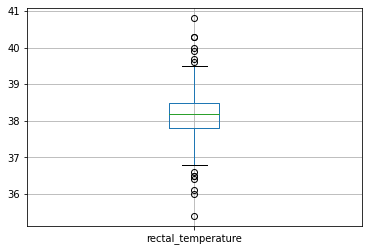

In [120]:
# Mean или median?
all_horses_df.boxplot(column=['rectal_temperature'])
plt.show()
# Есть несколько выбросов как в одну так и в другую сторону, но они практически симметричны,
# и поэтому не должны давать сильное искажение mean, распределение похоже на нормальное,
# поэтому mean и median не должны сильно различатсья

In [121]:
print(
    f"Mean rectal temp: {round(all_horses_df['rectal_temperature'].mean(), 3)} \n"
    f"Median rectal temp: {all_horses_df['rectal_temperature'].median()}"
)

Mean rectal temp: 38.17 
Median rectal temp: 38.2


In [122]:
all_horses_df['rectal_temperature'].fillna(
    round(all_horses_df['rectal_temperature'].mean(), 1), inplace=True)

Mean rectal temp: 38.175 
Median rectal temp: 38.2


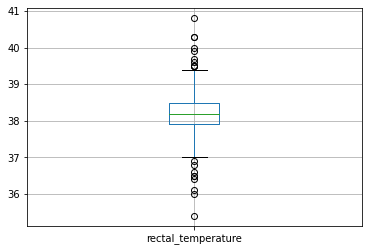

In [123]:
print(
    f"Mean rectal temp: {round(all_horses_df['rectal_temperature'].mean(), 3)} \n"
    f"Median rectal temp: {all_horses_df['rectal_temperature'].median()}"
)

all_horses_df.boxplot(column=['rectal_temperature'])
plt.show()

### Pulse

In [125]:
# нормальное значение 30-40 уд
# повышенный пульс связан с circulatory shock
# (Cool и cold температура конечностей, rectal temperature, ниже 37.8,
# pulse, выше 30 - 40 mucous membranes, pale pink)

# Пропуски незначительно коррелируют с rectal temperature, 
# но предыдущее изучение данных не показало взаимосвязи между данными
# MAR


In [126]:
# Попробуем разделить на группы и определить средние значения внутри групп

norm_pulse = all_horses_df[all_horses_df['pulse'] <= 40]
high_pulse = all_horses_df[all_horses_df['pulse'] > 40]

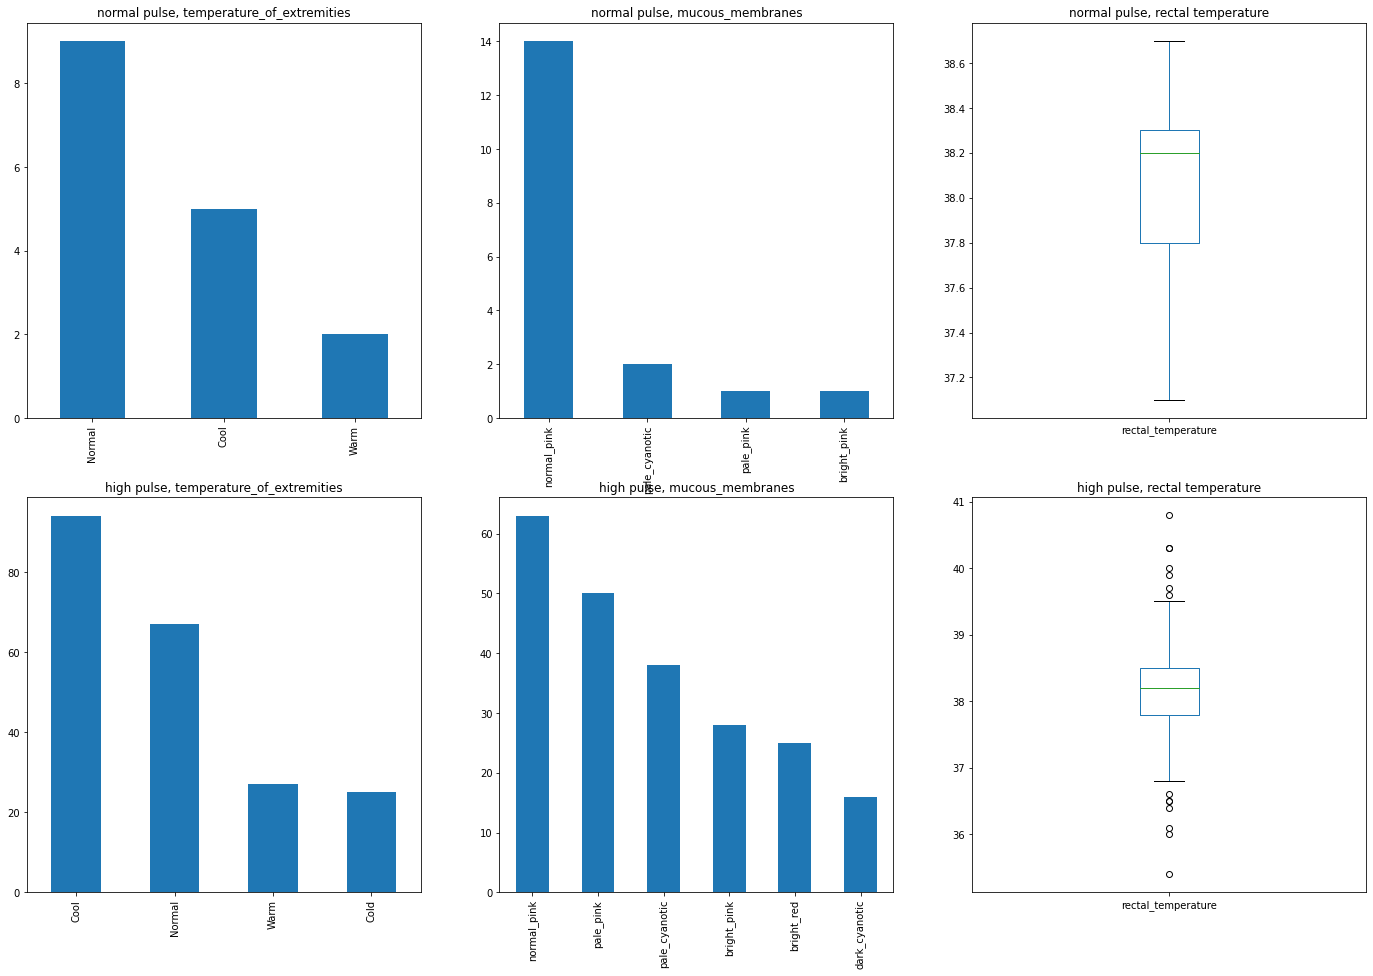

In [127]:
# Значения должны различаться согласно описанию выше для выбранных групп

fig9, axs9 = plt.subplots(2, 3, figsize=(24, 16))
norm_pulse['temperature_of_extremities'].value_counts().plot(kind='bar', ax=axs9[0, 0])
norm_pulse['mucous_membranes'].value_counts().plot(kind='bar', ax=axs9[0, 1])
norm_pulse['rectal_temperature'].plot(kind='box', ax=axs9[0, 2])

high_pulse['temperature_of_extremities'].value_counts().plot(kind='bar', ax=axs9[1, 0])
high_pulse['mucous_membranes'].value_counts().plot(kind='bar', ax=axs9[1, 1])
high_pulse['rectal_temperature'].plot(kind='box', ax=axs9[1, 2])

axs9[0, 0].set_title("normal pulse, temperature_of_extremities")
axs9[0, 1].set_title("normal pulse, mucous_membranes")
axs9[0, 2].set_title("normal pulse, rectal temperature")

axs9[1, 0].set_title("high pulse, temperature_of_extremities")
axs9[1, 1].set_title("high pulse, mucous_membranes")
axs9[1, 2].set_title("high pulse, rectal temperature")

plt.show()

# сравнение данных показывает, что деление на группы невозможно т.к. данные не различаются существенно
# выбираем замену пропусков на средние значения по всем данным

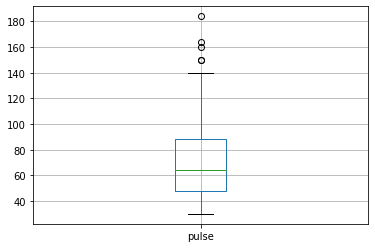

In [128]:
# Mean или median?
all_horses_df.boxplot(column=['pulse'])
plt.show()

# Распределение скошено, большая часть данных приходится на более маленькие значения,
# в то время как выбросы есть только среди значений превышающие норму для этого показателя в несколько раз
# медиана и среднее будут различаться

In [141]:
print(
    f"Mean rectal temp: {round(all_horses_df['pulse'].mean(), 3)} \n"
    f"Median rectal temp: {all_horses_df['pulse'].median()} \n"
    f"Mode rectal temp: {all_horses_df['pulse'].mode().to_numpy()[0]}"
)

Mean rectal temp: 71.941 
Median rectal temp: 64.0 
Mode rectal temp: 48.0


In [142]:
# Количество выбросов не такое большое, чтобы повлиять на медиану, поэтому лучшим решением будет
# заполнить пропуски медианным значением

In [143]:
all_horses_df['pulse'].fillna(all_horses_df['pulse'].median(), inplace=True)

In [145]:
print(
    f"Mean rectal temp: {round(all_horses_df['pulse'].mean(), 3)} \n"
    f"Median rectal temp: {all_horses_df['pulse'].median()} \n"
    f"Mode rectal temp: {all_horses_df['pulse'].mode().to_numpy()[0]}"
)

Mean rectal temp: 71.5 
Median rectal temp: 64.0 
Mode rectal temp: 48.0


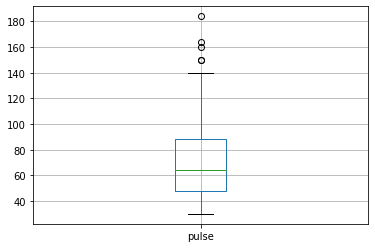

In [146]:
all_horses_df.boxplot(column=['pulse'])
plt.show()

### temperature_of_extremities

Значение показателя warm кореллирует с повышенной ректальной температурой.
Cool и cold c шоком:

- rectal temperature, ниже 37.8
- pulse, выше 30 - 40
- mucous membranes, pale pink

peripheral pulse: cool - redused, cold - absent, normal - normal, warm - increased

Пропуски положительно кореллируют с persistalsis, abdominal_distention, mucous_membranes, peripheral_pulse
посмотрим как взаимосвязаны пропуски

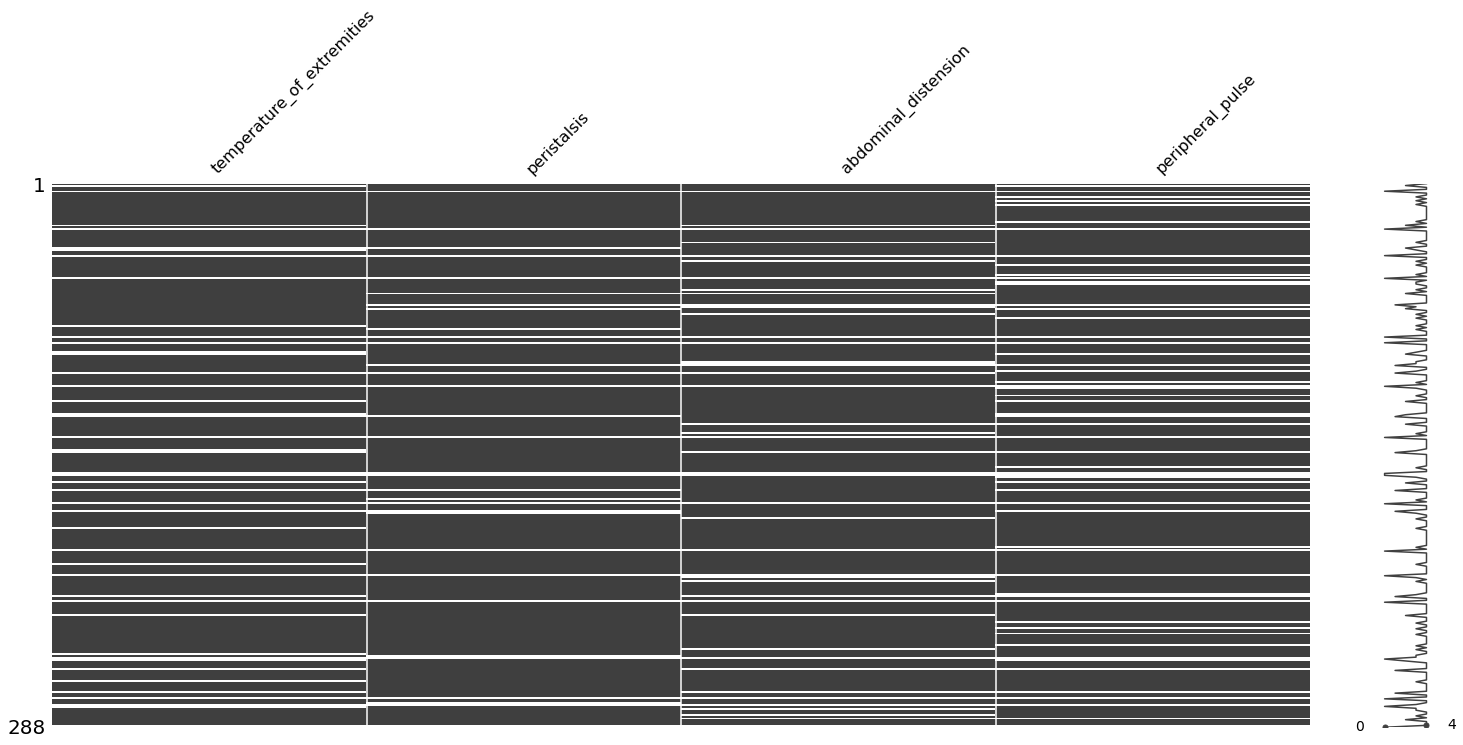

In [147]:
msno.matrix(all_horses_df[['temperature_of_extremities', 'peristalsis',
                           'abdominal_distension', 'peripheral_pulse']])
plt.show()

# Есть данные, где отсутствуют все 4 значения, посмотрим на данные подробнее

In [150]:
tmp_extrem = all_horses_df[ (all_horses_df['temperature_of_extremities'].isna()) &
               (all_horses_df['peristalsis'].isna()) &
               (all_horses_df['abdominal_distension'].isna()) &
               (all_horses_df['peripheral_pulse'].isna())]

tmp_extrem.head(30)

# У записей с пропусками этих данных, много пропусков и по другим данным,
# так что взаимосвязь скорее всего случайна

,surgery,Age,Hospital_Number,rectal_temperature,pulse,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,rectal_examination_feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,type_of_lesion_1,type_of_lesion_2,type_of_lesion_3
4,no_surgery,adult,530255,37.3,104.0,NaN,NaN,dark_cyanotic,poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,No,4300.0,0.0,0.0
25,no_surgery,adult,529518,37.8,60.0,NaN,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lived,No,0.0,0.0,0.0
41,no_surgery,young,5288249,39.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,8.5,NaN,0.1,lived,Yes,9400.0,0.0,0.0
53,no_surgery,adult,530544,38.6,40.0,NaN,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,6.4,NaN,NaN,lived,No,3111.0,0.0,0.0
87,no_surgery,adult,528006,38.2,40.0,NaN,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,7.0,cloudy,3.9,euthanized,Yes,2208.0,0.0,0.0
90,no_surgery,adult,534197,38.0,52.0,NaN,NaN,NaN,NaN,depressed,NaN,NaN,NaN,less_1_liter,normal,normal,53.0,86.0,NaN,NaN,lived,Yes,2322.0,0.0,0.0
113,surgery,adult,527933,36.8,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,died,Yes,3205.0,0.0,0.0
141,no_surgery,adult,522979,36.0,42.0,NaN,NaN,bright_red,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,6.8,NaN,NaN,died,No,1400.0,0.0,0.0
160,surgery,adult,527916,38.2,64.0,NaN,NaN,NaN,NaN,intermittent_severe_pain,NaN,NaN,none,none,NaN,distended_large_intestine,35.0,58.0,cloudy,1.0,lived,Yes,4205.0,0.0,0.0
161,surgery,adult,530431,38.3,42.0,NaN,NaN,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,8.5,NaN,NaN,died,Yes,7113.0,0.0,0.0


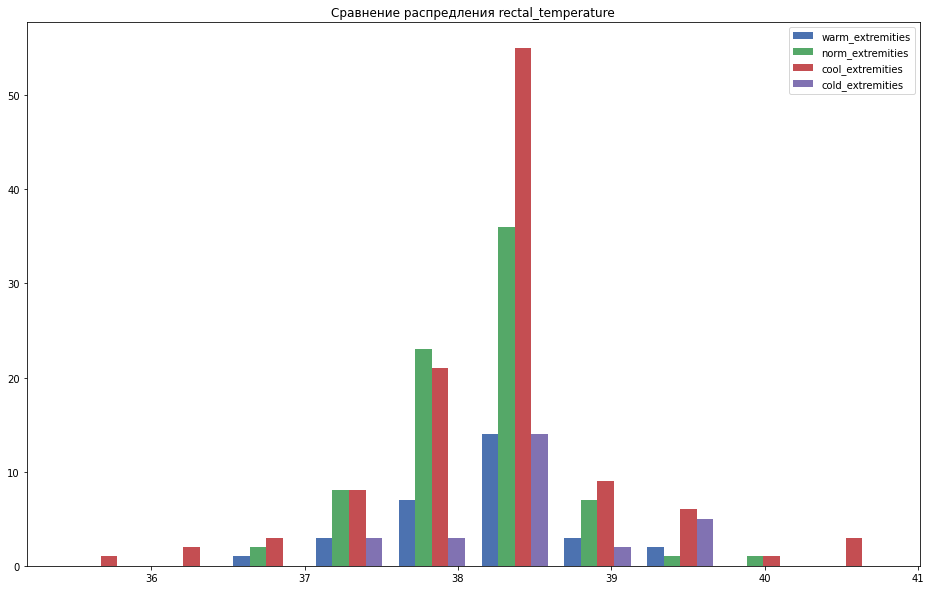

In [154]:
# Проверим взаимосвязь значений temperature_of_extremities с другими значениями,
# чтобы проверить можно ли разделить данные на группы для заполнения пропусков

# Значение показателя warm кореллирует с повышенной ректальной температурой
plt.style.use('seaborn-deep')

fig10, ax10 = plt.subplots(figsize=(16, 10))
warm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Warm' ]['rectal_temperature']
norm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Normal' ]['rectal_temperature']
cold_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cold']['rectal_temperature']
cool_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cool']['rectal_temperature']

ax10.hist([warm_extremities, norm_extremities, cool_extremities, cold_extremities],
          label=['warm_extremities', 'norm_extremities', 'cool_extremities', 'cold_extremities'])
plt.title('Сравнение распредления rectal_temperature')
plt.legend(loc='upper right')
plt.show()

# сравнение распределений показывает, что корреляции между warm temperature_of_extremities
# и повышенной ректальной температурой отсутствует, все выборки распределены примерно одинаково

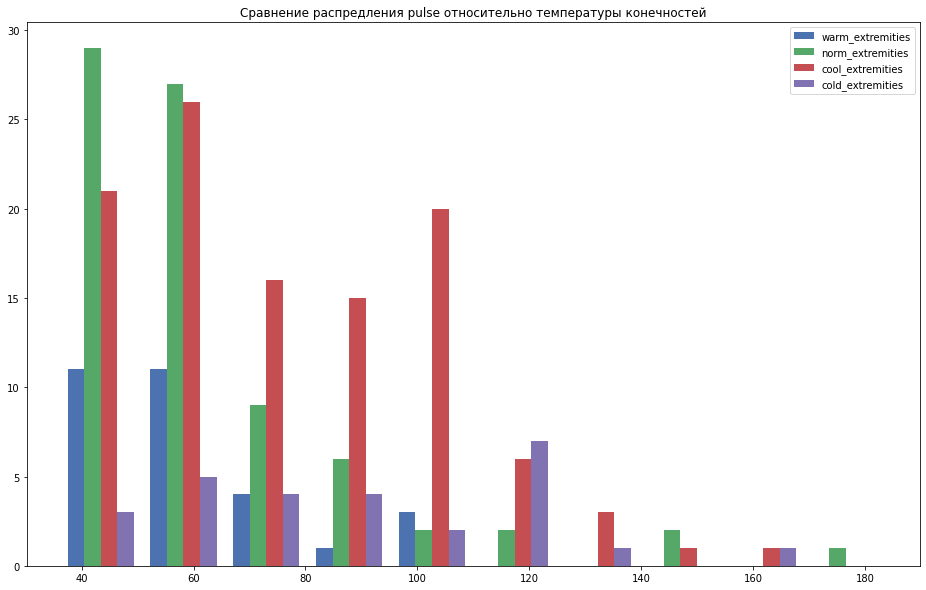

In [155]:
plt.style.use('seaborn-deep')

fig11, ax11 = plt.subplots(figsize=(16, 10))
warm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Warm' ]['pulse']
norm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Normal' ]['pulse']
cold_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cold']['pulse']
cool_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cool']['pulse']

ax11.hist([warm_extremities, norm_extremities, cool_extremities, cold_extremities],
          label=['warm_extremities', 'norm_extremities', 'cool_extremities', 'cold_extremities'])
plt.title('Сравнение распредления pulse относительно температуры конечностей')
plt.legend(loc='upper right')
plt.show()

# взаимосвязь также не прослеживается

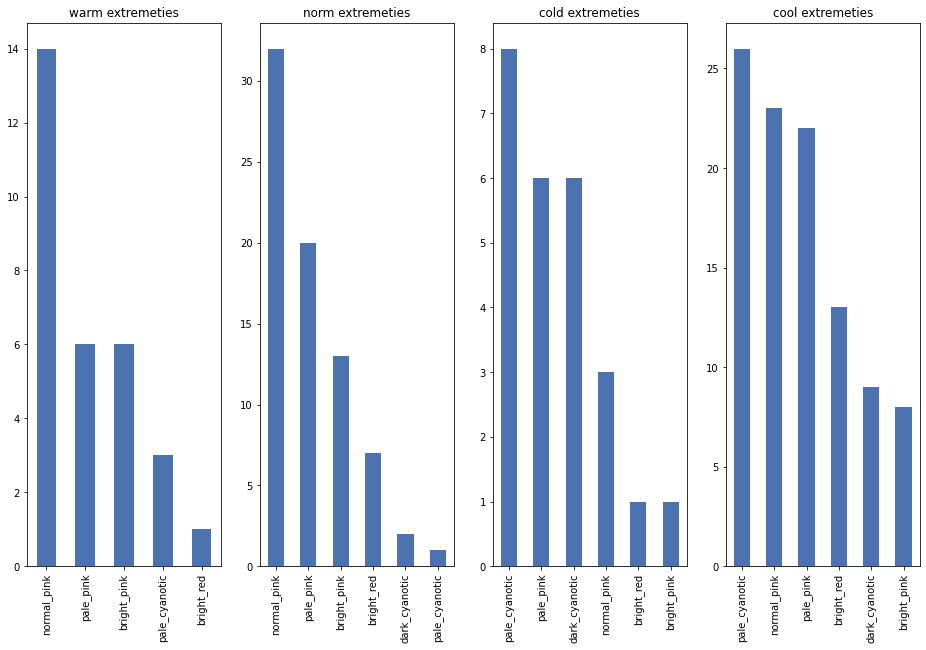

In [156]:
plt.style.use('seaborn-deep')

fig11, axs11 = plt.subplots(1,4, figsize=(16, 10))
warm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Warm' ]['mucous_membranes']\
    .value_counts().plot(kind='bar', ax=axs11[0])
norm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Normal' ]['mucous_membranes']\
    .value_counts().plot(kind='bar', ax=axs11[1])
cold_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cold']['mucous_membranes']\
    .value_counts().plot(kind='bar', ax=axs11[2])
cool_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cool']['mucous_membranes']\
    .value_counts().plot(kind='bar', ax=axs11[3])

axs11[0].set_title('warm extremeties')
axs11[1].set_title('norm extremeties')
axs11[2].set_title('cold extremeties')
axs11[3].set_title('cool extremeties')

plt.show()

# Если mucous membranes normal_pink, то температура конечностей скорее всего будет norm, warm, cool,
# Если pale_cyanotic, то cool или cold
# dark_cyanotic - cool или cold
# Можно будет использовать эти значения если не будет найдено более четкой группировки по другим

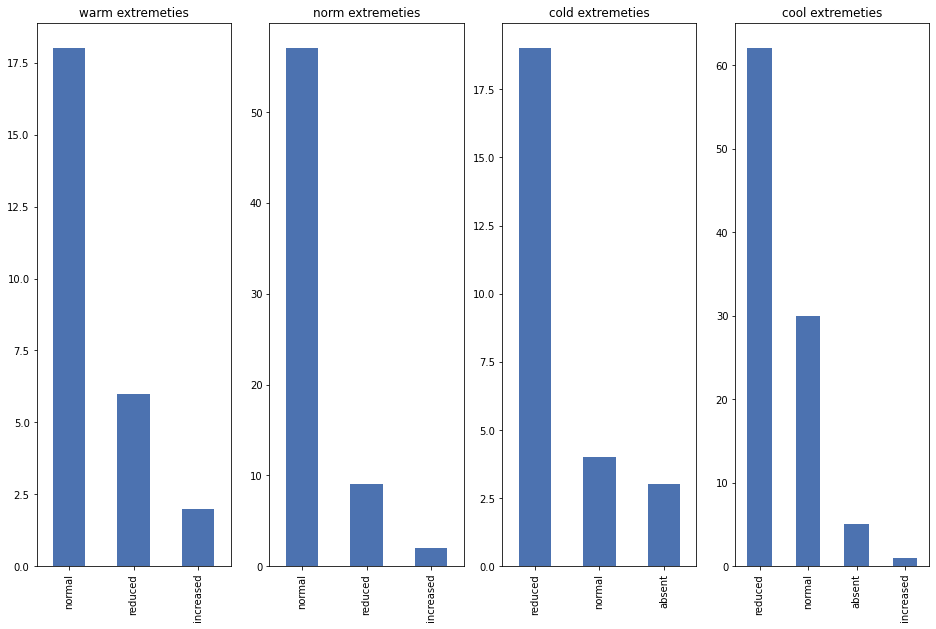

In [158]:
plt.style.use('seaborn-deep')

fig12, axs12 = plt.subplots(1,4, figsize=(16, 10))
warm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Warm' ]['peripheral_pulse']\
    .value_counts().plot(kind='bar', ax=axs12[0])
norm_extremities = all_horses_df[ all_horses_df['temperature_of_extremities']=='Normal' ]['peripheral_pulse']\
    .value_counts().plot(kind='bar', ax=axs12[1])
cold_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cold']['peripheral_pulse']\
    .value_counts().plot(kind='bar', ax=axs12[2])
cool_extremities = all_horses_df[all_horses_df['temperature_of_extremities']=='Cool']['peripheral_pulse']\
    .value_counts().plot(kind='bar', ax=axs12[3])

axs12[0].set_title('warm extremeties')
axs12[1].set_title('norm extremeties')
axs12[2].set_title('cold extremeties')
axs12[3].set_title('cool extremeties')

plt.show()

# redused - cool или cold
# absent - cool, cold
# normal - normal, warm
# increased - warm, norm, cool

In [160]:
# Используем группировку по значениям peripheral pulse для заполнения пропусков

all_horses_df.loc[ (all_horses_df['peripheral_pulse']=='reduced') &
                   (all_horses_df['temperature_of_extremities'].isna()), 'temperature_of_extremities']='Cool'


In [161]:
all_horses_df.loc[ (all_horses_df['peripheral_pulse']=='absent') &
                   (all_horses_df['temperature_of_extremities'].isna()), 'temperature_of_extremities']='Cold'

In [162]:
all_horses_df.loc[ (all_horses_df['peripheral_pulse']=='normal') &
                   (all_horses_df['temperature_of_extremities'].isna()), 'temperature_of_extremities']='Normal'

In [163]:
all_horses_df.loc[ (all_horses_df['peripheral_pulse']=='increased') &
                   (all_horses_df['temperature_of_extremities'].isna()), 'temperature_of_extremities']='Warm'

In [164]:
all_horses_df['temperature_of_extremities'].isna().sum()

# Осталось 31 незаполненное пропущенное значений, т.к. нехватает данных для определения группы,
# заполним пропущенные значения модой - cool

31

In [165]:
all_horses_df['temperature_of_extremities'].fillna('Cool', inplace=True)

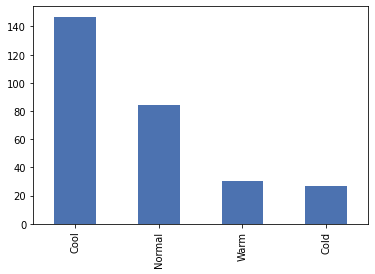

In [166]:
all_horses_df['temperature_of_extremities'].value_counts().plot(kind='bar')
plt.show()

### Peristalsis


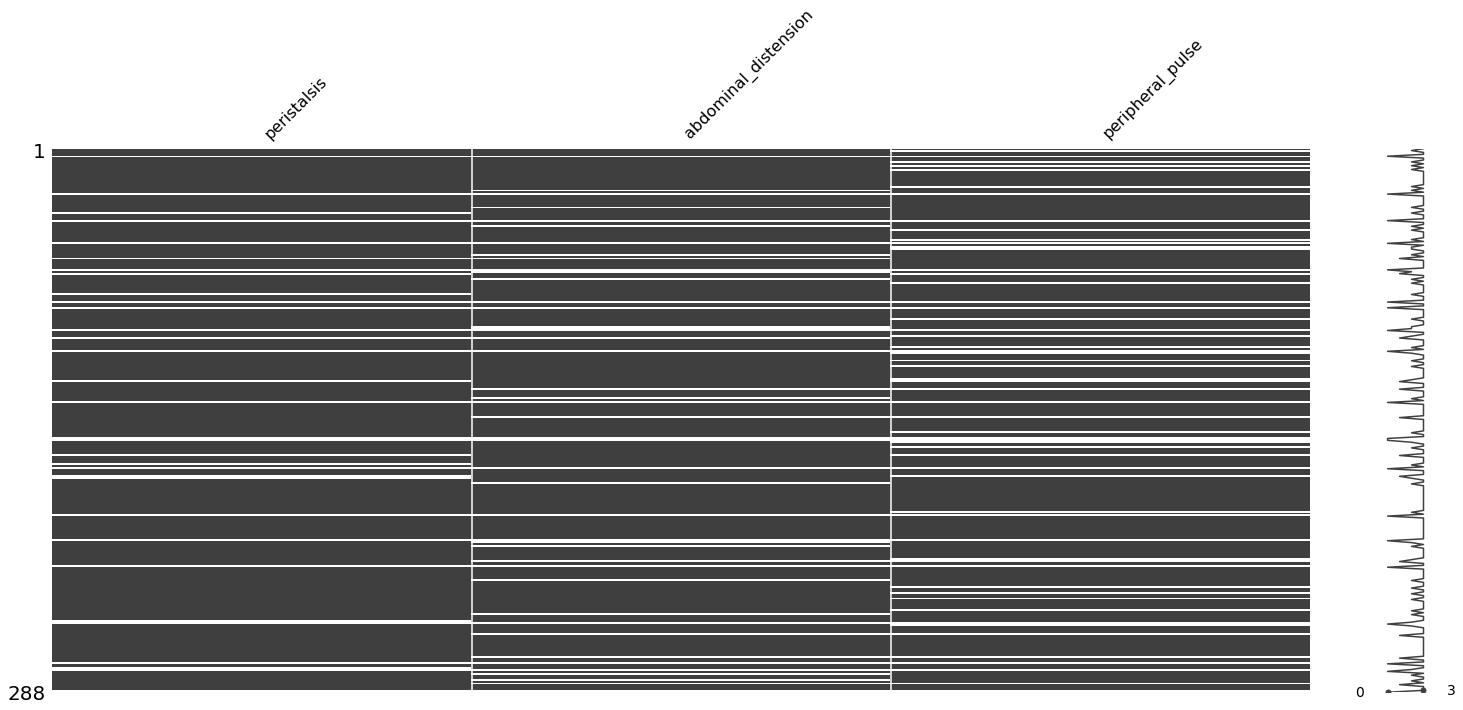

In [167]:
### Peristalsis
# peristalsis hypomotile, absent связан с abdominal_distention moderate, severe
# peristalsis absent может быть связан с rectal_examination_feces absent

# Пропуски положительно коррелируют с temperature_of_extremeties, peripheral_pulse, abdominal_distention
# посмотрим как взаимосвязаны пропуски
msno.matrix(all_horses_df[['peristalsis', 'abdominal_distension',
                           'peripheral_pulse']])
plt.show()


perist_nan = all_horses_df[ (all_horses_df['peristalsis'].isna()) &
               (all_horses_df['abdominal_distension'].isna()) &
               (all_horses_df['peripheral_pulse'].isna())]

# здесь ситуция с пропусками та же -
# у записей с пропусками в этих данных много пропусков и по другим данным

# Возможно есть причина пропуска этих данных, но исходя из имеющейся информации, она не очевидна
# MAR

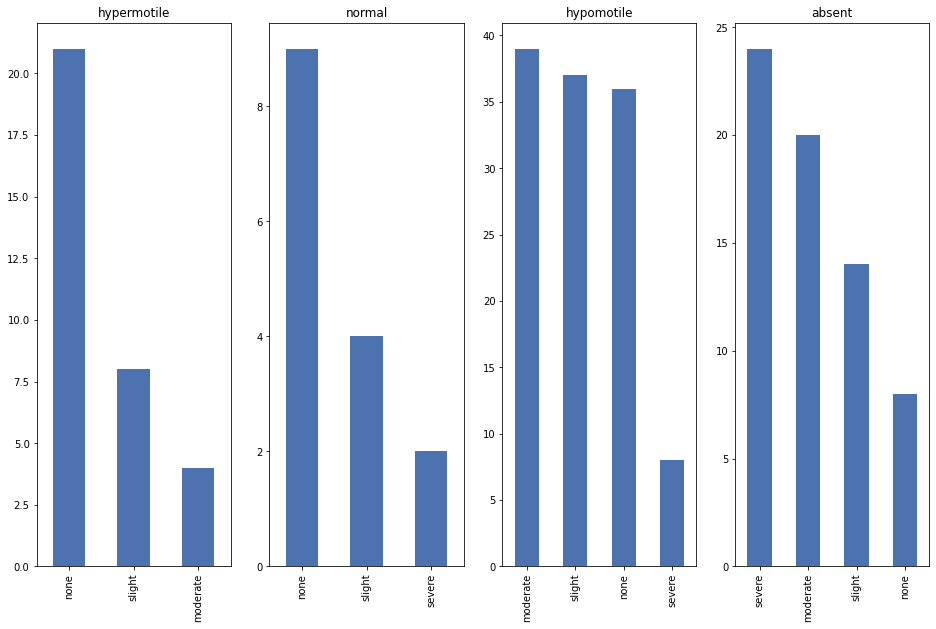

In [169]:
# Проверим взаимосвязь значений peristalsis с другими значениями,
# чтобы проверить можно ли разделить данные на группы для заполнения пропусков

# Значение показателя peristalsis hypomotile с abdominal_distention (вздутие) moderate, severe

plt.style.use('seaborn-deep')

fig13, ax13 = plt.subplots(1,4, figsize=(16, 10))

hypermotile = all_horses_df[ all_horses_df['peristalsis']=='hypermotile' ]['abdominal_distension']\
    .value_counts().plot(kind='bar', ax=ax13[0])
normal = all_horses_df[ all_horses_df['peristalsis']=='normal' ]['abdominal_distension']\
    .value_counts().plot(kind='bar', ax=ax13[1])
hypomotile = all_horses_df[all_horses_df['peristalsis']=='hypomotile']['abdominal_distension']\
    .value_counts().plot(kind='bar', ax=ax13[2])
absent = all_horses_df[all_horses_df['peristalsis']=='absent']['abdominal_distension']\
    .value_counts().plot(kind='bar', ax=ax13[3])

ax13[0].set_title('hypermotile')
ax13[1].set_title('normal')
ax13[2].set_title('hypomotile')
ax13[3].set_title('absent')

plt.show()


# hypermotile = none, slight
# normal = none, slight
# hypomotile = moderate, slight
# absent = severe, moderate

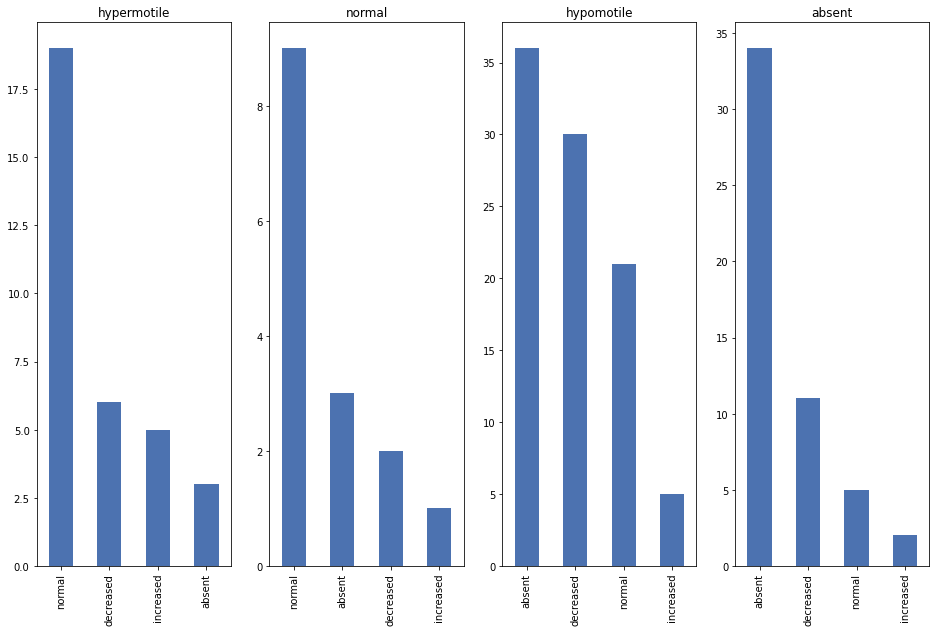

In [170]:
# Проверим взаимосвязь значений peristalsis с другими значениями,
# чтобы проверить можно ли разделить данные на группы для заполнения пропусков

# Значение показателя peristalsis absent с rectal_examination_feces absent

plt.style.use('seaborn-deep')

fig14, ax14 = plt.subplots(1,4, figsize=(16, 10))

hypermotile = all_horses_df[ all_horses_df['peristalsis']=='hypermotile' ]['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax14[0])
normal = all_horses_df[ all_horses_df['peristalsis']=='normal' ]['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax14[1])
hypomotile = all_horses_df[all_horses_df['peristalsis']=='hypomotile']['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax14[2])
absent = all_horses_df[all_horses_df['peristalsis']=='absent']['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax14[3])

ax14[0].set_title('hypermotile')
ax14[1].set_title('normal')
ax14[2].set_title('hypomotile')
ax14[3].set_title('absent')

plt.show()

# данные сложно интерпертировать, если взаимосвязь между peristalsis и rectal_examination_feces,
# но эти данные сложно использовать для группировки

In [171]:
# для формирования групп будем использовать группировку по abdominal_distention

all_horses_df.loc[ (all_horses_df['abdominal_distension']=='none') &
                   (all_horses_df['peristalsis'].isna()), 'peristalsis']='hypermotile'

In [172]:
all_horses_df.loc[ (all_horses_df['abdominal_distension']=='slight') &
                   (all_horses_df['peristalsis'].isna()), 'peristalsis']='normal'

In [173]:
all_horses_df.loc[ (all_horses_df['abdominal_distension']=='moderate') &
                   (all_horses_df['peristalsis'].isna()), 'peristalsis']='hypomotile'

In [174]:
all_horses_df.loc[ (all_horses_df['abdominal_distension']=='severe') &
                   (all_horses_df['peristalsis'].isna()), 'peristalsis']='absent'

In [175]:
all_horses_df['peristalsis'].isna().sum()

# Осталось 22 незаполненных значения, там, где abdominal_distension так же имеет пропуски,
# заполним пропущенные значения модой - hypomotile

22

In [176]:
all_horses_df['peristalsis'].fillna('hypomotile', inplace=True)

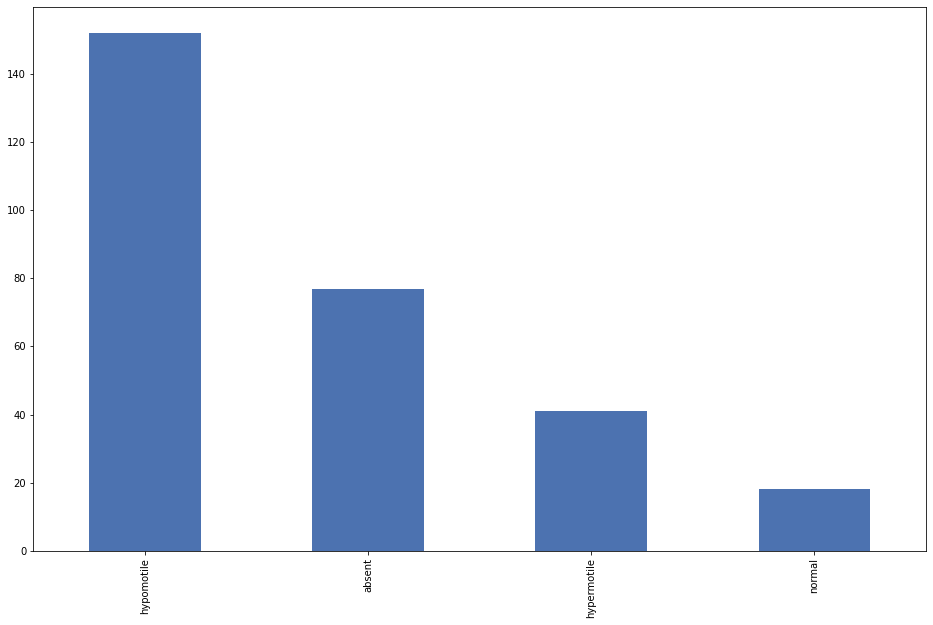

In [178]:
all_horses_df['peristalsis'].value_counts().plot(kind='bar', figsize=(16, 10))
plt.show()

### Abdomen


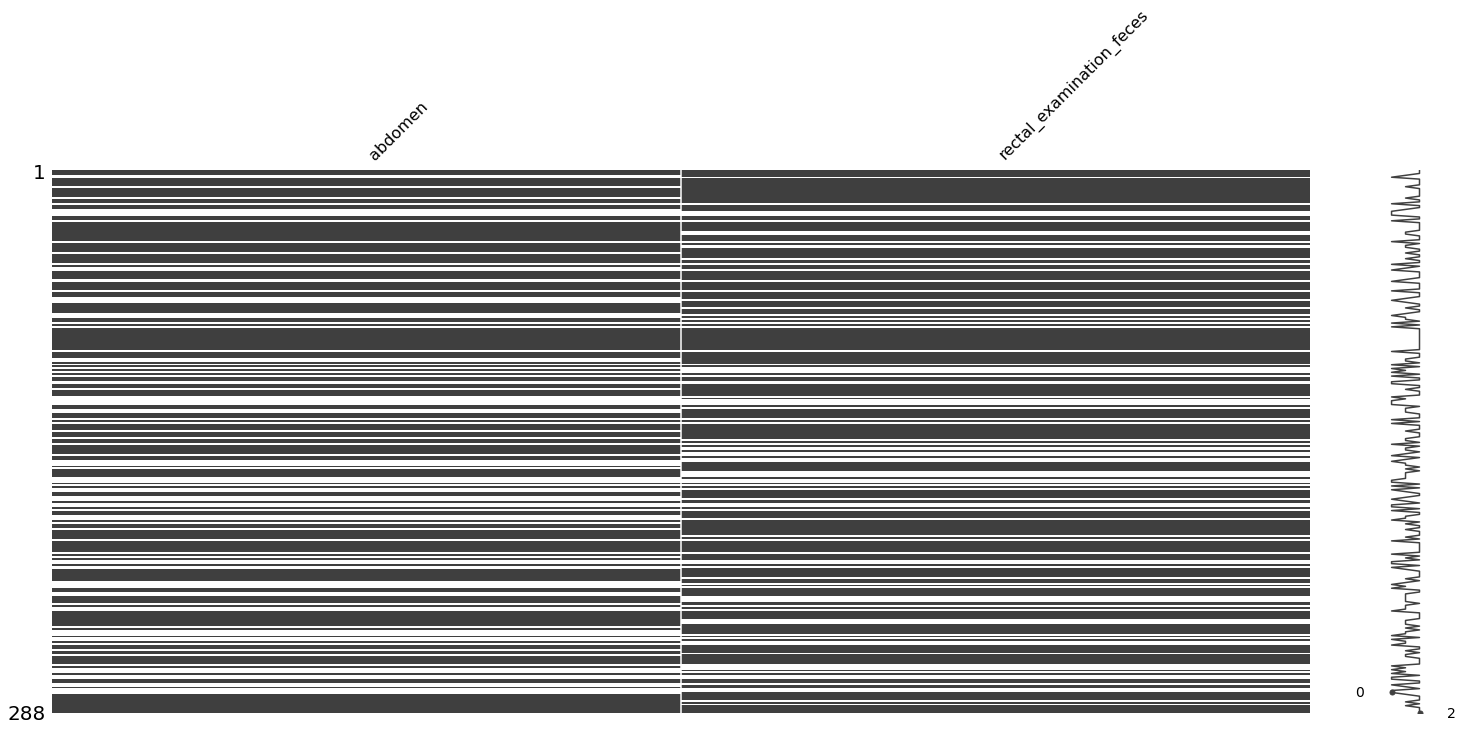

In [179]:
# abdomen firm_feces_large_intestine может быть связан с rectal_examination_feces absent
# и nasogastric_reflux больше 1 литра.
# abdomen distended small intestine и distended large intestine с хирургическими осложнениями -
# первая цифра 2 = sm intestine или  3 = lg colon, четвертая цифра 1 = obstruction

# пропуски незначительно кореллируют с rectal_examination_feces

msno.matrix(all_horses_df[['abdomen', 'rectal_examination_feces']])
plt.show()


abdomen_nan = all_horses_df[ (all_horses_df['abdomen'].isna()) &
               (all_horses_df['rectal_examination_feces'].isna())]

# Взаимосвязь пропусков выглядит случайной, т.к. в Abdomen и rectal_examination_feces много пропусков (> 30%)
# Более того, в записях с пропущенными Abdomen и rectal_examination_feces много пропусков и по другим данным

# Причина пропусков не ясна, возможно это не обязательное обследование
# и для принятия нужного решения достаточно набора других данных
# MAR


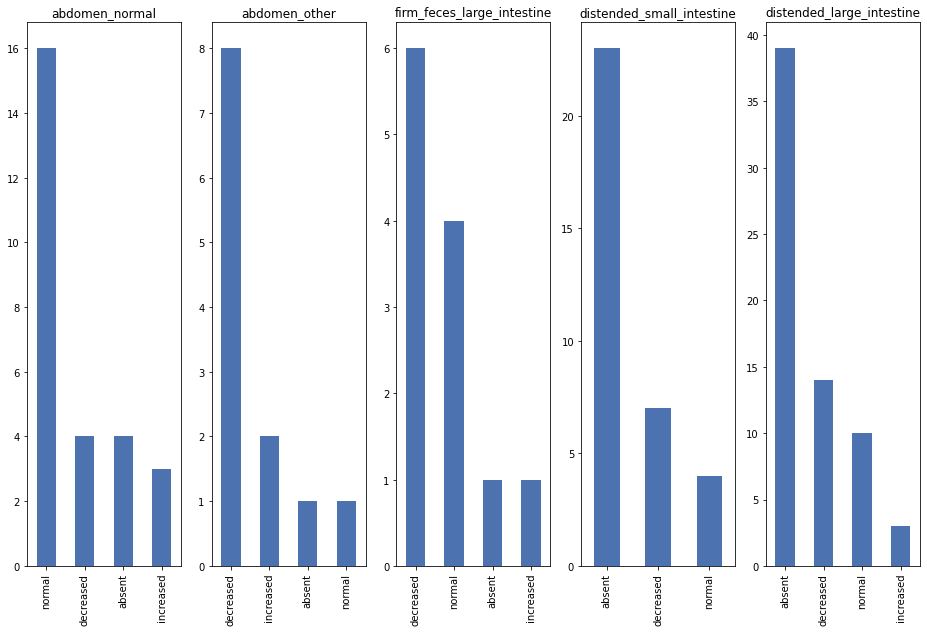

In [180]:
# Проверим взаимосвязь значений abdomen с другими значениями,
# чтобы проверить можно ли разделить данные на группы для заполнения пропусков

# abdomen firm_feces_large_intestine может быть связан с rectal_examination_feces absent

plt.style.use('seaborn-deep')

fig15, ax15 = plt.subplots(1,5, figsize=(16, 10))

abdomen_normal = all_horses_df[ all_horses_df['abdomen']=='normal' ]['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax15[0])
abdomen_other = all_horses_df[ all_horses_df['abdomen']=='other' ]['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax15[1])
firm_feces_large_intestine = all_horses_df[all_horses_df['abdomen']=='firm_feces_large_intestine']['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax15[2])
distended_small_intestine = all_horses_df[all_horses_df['abdomen']=='distended_small_intestine']['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax15[3])
distended_large_intestine = all_horses_df[all_horses_df['abdomen']=='distended_large_intestine']['rectal_examination_feces']\
    .value_counts().plot(kind='bar', ax=ax15[4])

ax15[0].set_title('abdomen_normal')
ax15[1].set_title('abdomen_other')
ax15[2].set_title('firm_feces_large_intestine')
ax15[3].set_title('distended_small_intestine')
ax15[4].set_title('distended_large_intestine')


plt.show()

# normal feces = abdomen normal
# decreased нет четкой взаимосвязи
# increased нет четкой взаимосвязи
# absent = distended_large_intestine, distended_small_intestine


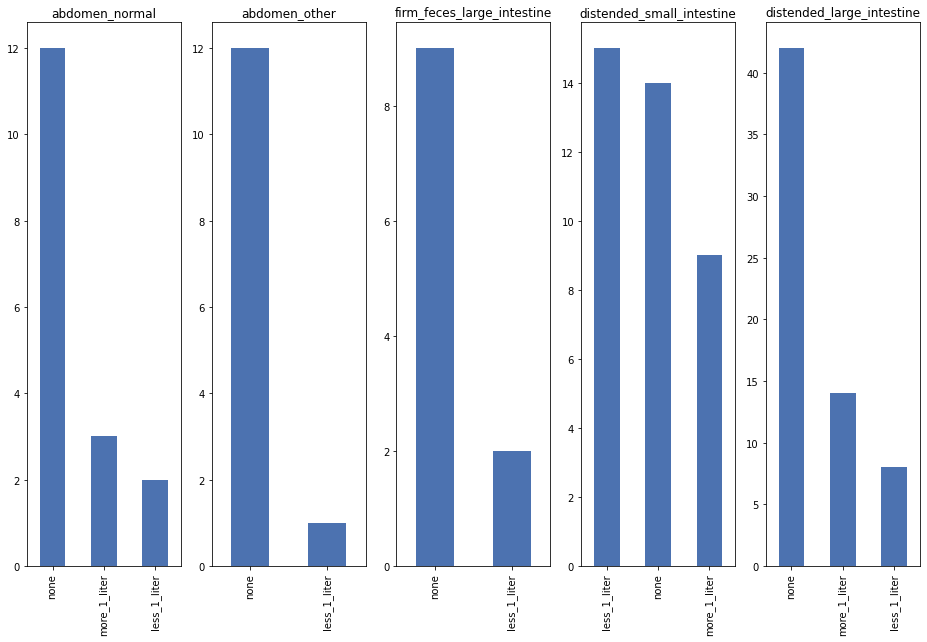

In [181]:
# abdomen firm_feces_large_intestine и nasogastric_reflux больше 1 литра

plt.style.use('seaborn-deep')

fig16, ax16 = plt.subplots(1,5, figsize=(16, 10))

abdomen_normal = all_horses_df[ all_horses_df['abdomen']=='normal' ]['nasogastric_reflux']\
    .value_counts().plot(kind='bar', ax=ax16[0])
abdomen_other = all_horses_df[ all_horses_df['abdomen']=='other' ]['nasogastric_reflux']\
    .value_counts().plot(kind='bar', ax=ax16[1])
firm_feces_large_intestine = all_horses_df[all_horses_df['abdomen']=='firm_feces_large_intestine']['nasogastric_reflux']\
    .value_counts().plot(kind='bar', ax=ax16[2])
distended_small_intestine = all_horses_df[all_horses_df['abdomen']=='distended_small_intestine']['nasogastric_reflux']\
    .value_counts().plot(kind='bar', ax=ax16[3])
distended_large_intestine = all_horses_df[all_horses_df['abdomen']=='distended_large_intestine']['nasogastric_reflux']\
    .value_counts().plot(kind='bar', ax=ax16[4])

ax16[0].set_title('abdomen_normal')
ax16[1].set_title('abdomen_other')
ax16[2].set_title('firm_feces_large_intestine')
ax16[3].set_title('distended_small_intestine')
ax16[4].set_title('distended_large_intestine')


plt.show()

# взаимосвязь между данными не проследивается

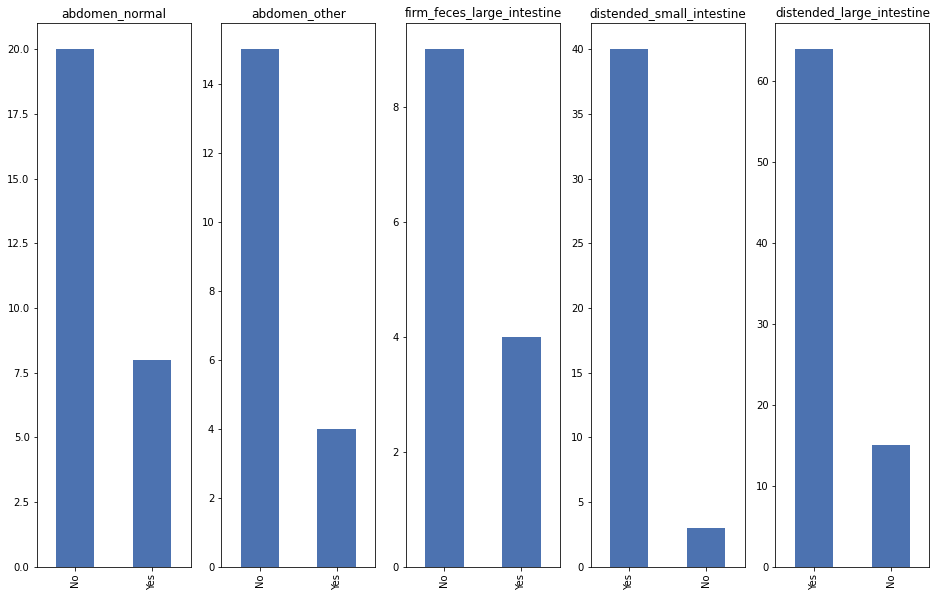

In [182]:
 # abdomen distended small intestine и distended large intestine с хирургическими осложнениями

plt.style.use('seaborn-deep')

fig17, ax17 = plt.subplots(1,5, figsize=(16, 10))

abdomen_normal = all_horses_df[ all_horses_df['abdomen']=='normal' ]['surgical_lesion']\
    .value_counts().plot(kind='bar', ax=ax17[0])
abdomen_other = all_horses_df[ all_horses_df['abdomen']=='other' ]['surgical_lesion']\
    .value_counts().plot(kind='bar', ax=ax17[1])
firm_feces_large_intestine = all_horses_df[all_horses_df['abdomen']=='firm_feces_large_intestine']['surgical_lesion']\
    .value_counts().plot(kind='bar', ax=ax17[2])
distended_small_intestine = all_horses_df[all_horses_df['abdomen']=='distended_small_intestine']['surgical_lesion']\
    .value_counts().plot(kind='bar', ax=ax17[3])
distended_large_intestine = all_horses_df[all_horses_df['abdomen']=='distended_large_intestine']['surgical_lesion']\
    .value_counts().plot(kind='bar', ax=ax17[4])

ax17[0].set_title('abdomen_normal')
ax17[1].set_title('abdomen_other')
ax17[2].set_title('firm_feces_large_intestine')
ax17[3].set_title('distended_small_intestine')
ax17[4].set_title('distended_large_intestine')


plt.show()

# Есть взаимосвяязь между отсутствием хирургических осложнений и - abdomen normal,  abdomen other и firm feces large intestine
# Также как и наличием хирургических осложнений и distended large intestine, distended small intestine
# посмотрим побробнее на конкретные осложнения

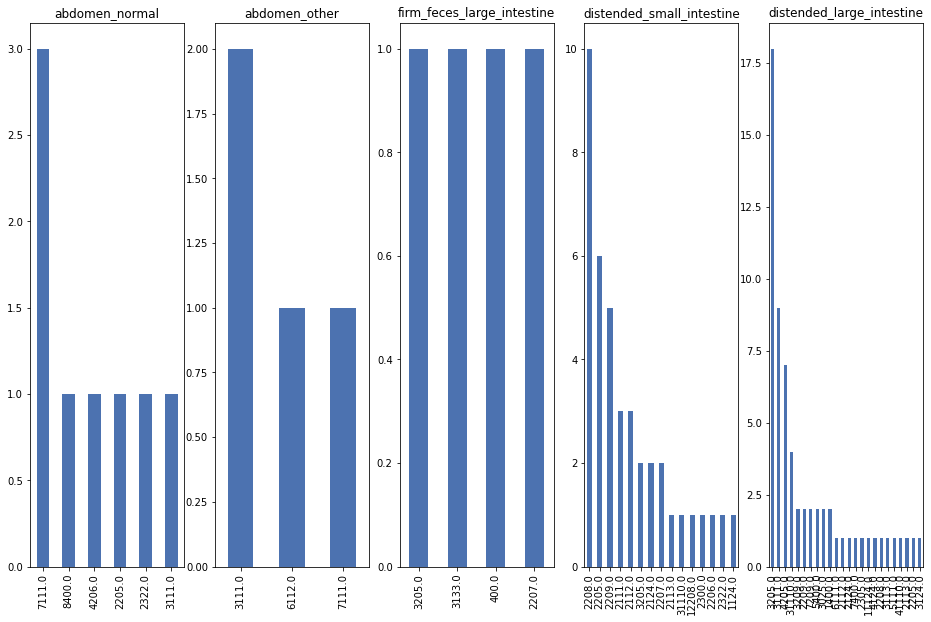

In [184]:
plt.style.use('seaborn-deep')

fig18, ax18 = plt.subplots(1,5, figsize=(16, 10))

abdomen_normal = all_horses_df[ (all_horses_df['abdomen']=='normal') &
                                (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1']\
.value_counts().plot(kind='bar', ax=ax18[0])

abdomen_other = all_horses_df[ (all_horses_df['abdomen']=='other') &
                                (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1']\
.value_counts().plot(kind='bar', ax=ax18[1])

firm_feces_large_intestine = all_horses_df[ (all_horses_df['abdomen']=='firm_feces_large_intestine') &
                                (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1']\
.value_counts().plot(kind='bar', ax=ax18[2])

distended_small_intestine = all_horses_df[ (all_horses_df['abdomen']=='distended_small_intestine') &
                                (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1']\
.value_counts().plot(kind='bar', ax=ax18[3])

distended_large_intestine = all_horses_df[ (all_horses_df['abdomen']=='distended_large_intestine') &
                                (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1']\
.value_counts().plot(kind='bar', ax=ax18[4])


ax18[0].set_title('abdomen_normal')
ax18[1].set_title('abdomen_other')
ax18[2].set_title('firm_feces_large_intestine')
ax18[3].set_title('distended_small_intestine')
ax18[4].set_title('distended_large_intestine')

plt.show()

# есть номера осложнений, которые появляются только при определенных значениях abdomen, найдем их

In [185]:
# Получим список осложнений, который появляется только при определенных значениях abdomen

normal_abdomen_lesion = set(all_horses_df[
    (all_horses_df['abdomen']=='normal') &
    (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1'].unique())

abdomen_other_lesion = set(all_horses_df[
    (all_horses_df['abdomen']=='other') &
    (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1'].unique())

firm_feces_large_intestine_lesion = set(all_horses_df[
    (all_horses_df['abdomen']=='firm_feces_large_intestine') &
    (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1'].unique())

distended_small_intestine_lesion = set(all_horses_df[
    (all_horses_df['abdomen']=='distended_small_intestine') &
    (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1'].unique())

distended_large_intestine_lesion = set(all_horses_df[
    (all_horses_df['abdomen']=='distended_large_intestine') &
    (all_horses_df['surgical_lesion']=='Yes') ]['type_of_lesion_1'].unique())

In [186]:
normal_abdomen_lesion_only = (normal_abdomen_lesion - abdomen_other_lesion -
                              firm_feces_large_intestine_lesion - distended_small_intestine_lesion -
                              distended_large_intestine_lesion)

abdomen_other_lesion_only = (abdomen_other_lesion - normal_abdomen_lesion -
                             firm_feces_large_intestine_lesion - distended_small_intestine_lesion -
                              distended_large_intestine_lesion)

firm_feces_large_intestine_lesion_only = (firm_feces_large_intestine_lesion - normal_abdomen_lesion -
                                          abdomen_other_lesion - distended_small_intestine_lesion -
                                          distended_large_intestine_lesion)

distended_small_intestine_lesion_only = (distended_small_intestine_lesion - firm_feces_large_intestine_lesion -
                                         normal_abdomen_lesion - abdomen_other_lesion -
                                         distended_large_intestine_lesion)

distended_large_intestine_lesion_only = (distended_large_intestine_lesion - distended_small_intestine_lesion -
                                         firm_feces_large_intestine_lesion - normal_abdomen_lesion -
                                         abdomen_other_lesion)

print(
    f"Normal abdomen: {normal_abdomen_lesion_only} \n"
    f"Other abdomen: {abdomen_other_lesion_only} \n"
    f"Firm_feces_large_intestine: {firm_feces_large_intestine_lesion_only} \n"
    f"Distended_small_intestine: {distended_small_intestine_lesion_only} \n"
    f"Distended_large_intestine: {distended_large_intestine_lesion_only} \n"
)

# Для normal, other abdomen и Distended_large_intestine взаимосвязь с типами осложенией скорее всего случайна,
# что следует из количества данных и описания,
# но для заполнения пропусков для Distended_small_intestine и Distended_large_intestine эти данные можно использовать

Normal abdomen: {8400.0, 4206.0} 
Other abdomen: {6112.0} 
Firm_feces_large_intestine: {400.0, 3133.0} 
Distended_small_intestine: {1124.0, 12208.0, 2300.0, 2206.0, 2111.0} 
Distended_large_intestine: {2305.0, 5400.0, 7400.0, 3209.0, 7209.0, 3113.0, 4205.0, 3025.0, 3124.0, 11124.0, 41110.0, 5111.0, 1400.0, 4124.0, 6111.0} 



In [187]:
all_horses_df.loc[ (all_horses_df['type_of_lesion_1'].isin(distended_small_intestine_lesion_only)) &
                   (all_horses_df['abdomen'].isna()), 'abdomen']='distended_small_intestine'

In [188]:
all_horses_df.loc[ (all_horses_df['type_of_lesion_1'].isin(distended_large_intestine_lesion_only)) &
                   (all_horses_df['abdomen'].isna()), 'abdomen']='distended_large_intestine'

In [189]:
all_horses_df['abdomen'].isna().sum()

# Осталось 87 незаполненное пропущенное значений. заполним их с помощью значений rectal_examination_feces

87

In [190]:
all_horses_df.loc[ (all_horses_df['rectal_examination_feces']=='normal' ) &
                   (all_horses_df['abdomen'].isna()), 'abdomen']='normal'

In [ ]:
all_horses_df.loc[ (all_horses_df['rectal_examination_feces']=='absent' ) &
                   (all_horses_df['abdomen'].isna()), 'abdomen']='distended_large_intestine'

In [ ]:
all_horses_df['abdomen'].isna().sum()

# Осталось 61 незаполненное значение, заполнение любым средним значением слишком сильно изменит распределение данных,
# но у нас недостаточно данных для группировки и заполнения пропусков средним/модой по группе
# удаление 5 части значений одинаково плохо отразится на данных, как и замена пропусков модой
# в такой ситуации логичнее всего принимать решение исходя из целей дальнейшей работы с этим датасетом,
# но т.к. у нас нет этой информации, будем считать, что в приоритете сохранить наибольшее количество данных

In [ ]:
# Заполним оставшиеся пропуски модой - distended_large_intestine

all_horses_df['abdomen'].fillna('distended_large_intestine')

In [ ]:
all_horses_df['abdomen'].value_counts().plot(kind='bar')
plt.show()

# Сформируем датасет без пропусков


In [ ]:

horses_df = all_horses_df.dropna(axis='columns', how='any')

In [191]:
horses_df.info()


In [192]:
all_horses_df['abdomen'].isna().sum()

# Осталось 61 незаполненное значение, заполнение любым средним значением слишком сильно изменит распределение данных,
# но у нас недостаточно данных для группировки и заполнения пропусков средним/модой по группе
# удаление 5 части значений одинаково плохо отразится на данных, как и замена пропусков модой
# в такой ситуации логичнее всего принимать решение исходя из целей дальнейшей работы с этим датасетом,
# но т.к. у нас нет этой информации, будем считать, что в приоритете сохранить наибольшее количество данных

61

In [193]:
# Заполним оставшиеся пропуски модой - distended_large_intestine

all_horses_df['abdomen'].fillna('distended_large_intestine')

0      distended_large_intestine
1                          other
2                         normal
3      distended_large_intestine
4      distended_large_intestine
                 ...            
295    distended_large_intestine
296    distended_small_intestine
297    distended_large_intestine
298    distended_small_intestine
299                       normal
Name: abdomen, Length: 288, dtype: object

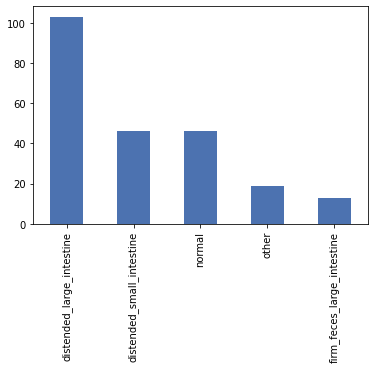

In [194]:
all_horses_df['abdomen'].value_counts().plot(kind='bar')
plt.show()

# Сформируем датасет без пропусков


In [195]:

horses_df = all_horses_df.dropna(axis='columns', how='any')

In [196]:
horses_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     288 non-null    object 
 1   Age                         288 non-null    object 
 2   Hospital_Number             288 non-null    int64  
 3   rectal_temperature          288 non-null    float64
 4   pulse                       288 non-null    float64
 5   temperature_of_extremities  288 non-null    object 
 6   peristalsis                 288 non-null    object 
 7   surgical_lesion             288 non-null    object 
 8   type_of_lesion_1            288 non-null    float64
 9   type_of_lesion_2            288 non-null    float64
 10  type_of_lesion_3            288 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 21.4+ KB
